In [3]:
library(Seurat)
library(Matrix)
library(dplyr)
library(ggrepel)
library(ggplot2)
library(reshape2)
library(gridExtra)
library(data.table)
library(vioplot)
library(harmony)
library(cowplot)
library(patchwork) 

library(future)
library(foreach)
library(doParallel)
options(future.globals.maxSize = 20 * 1024^3) 
packageVersion("Seurat")

[1] ‘5.2.1’

In [ ]:
# article : https://pubmed.ncbi.nlm.nih.gov/39693412/
# dataset : https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE253568

In [8]:
num_cores <- detectCores() - 1
cl <- makeCluster(num_cores)
registerDoParallel(cl)

result <- mclapply(1:100, function(x) {
  Sys.sleep(1)  
  x^2
}, mc.cores = num_cores)

In [9]:
# Reading the files

In [10]:
hd1_barcodes <- read.table(gzfile("GSM8023480_HD_1_barcodes.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
hd1_genes <- read.table(gzfile("GSM8023480_HD_1_features.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
hd1_matrix <- readMM(gzfile("GSM8023480_HD_1_matrix.mtx.gz"))

hd2_barcodes <- read.table(gzfile("GSM8023481_HD_2_barcodes.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
hd2_genes <- read.table(gzfile("GSM8023481_HD_2_features.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
hd2_matrix <- readMM(gzfile("GSM8023481_HD_2_matrix.mtx.gz"))

hd3_barcodes <- read.table(gzfile("GSM8023485_HD_3_barcodes.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
hd3_genes <- read.table(gzfile("GSM8023485_HD_3_features.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
hd3_matrix <- readMM(gzfile("GSM8023485_HD_3_matrix.mtx.gz"))

hd4_barcodes <- read.table(gzfile("GSM8023486_HD_4_barcodes.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
hd4_genes <- read.table(gzfile("GSM8023486_HD_4_features.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
hd4_matrix <- readMM(gzfile("GSM8023486_HD_4_matrix.mtx.gz"))

hd5_barcodes <- read.table(gzfile("GSM8023487_HD_5_barcodes.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
hd5_genes <- read.table(gzfile("GSM8023487_HD_5_features.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
hd5_matrix <- readMM(gzfile("GSM8023487_HD_5_matrix.mtx.gz"))

hd6_barcodes <- read.table(gzfile("GSM8023491_HD_6_barcodes.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
hd6_genes <- read.table(gzfile("GSM8023491_HD_6_features.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
hd6_matrix <- readMM(gzfile("GSM8023491_HD_6_matrix.mtx.gz"))

hd7_barcodes <- read.table(gzfile("GSM8023492_HD_7_barcodes.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
hd7_genes <- read.table(gzfile("GSM8023492_HD_7_features.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
hd7_matrix <- readMM(gzfile("GSM8023492_HD_7_matrix.mtx.gz"))

hd8_barcodes <- read.table(gzfile("GSM8023493_HD_8_barcodes.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
hd8_genes <- read.table(gzfile("GSM8023493_HD_8_features.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
hd8_matrix <- readMM(gzfile("GSM8023493_HD_8_matrix.mtx.gz"))

# head(hd3_barcodes, 2)
# head(hd3_genes, 2)
# head(hd3_matrix, 2)

rownames(hd1_matrix) <- hd1_genes$V2  
colnames(hd1_matrix) <- hd1_barcodes$V1
hd1 <- CreateSeuratObject(counts = hd1_matrix, project = "HD1")

rownames(hd2_matrix) <- hd2_genes$V2  
colnames(hd2_matrix) <- hd2_barcodes$V1
hd2 <- CreateSeuratObject(counts = hd2_matrix, project = "HD2")

rownames(hd3_matrix) <- hd3_genes$V2  
colnames(hd3_matrix) <- hd3_barcodes$V1
hd3 <- CreateSeuratObject(counts = hd3_matrix, project = "HD3")

rownames(hd4_matrix) <- hd4_genes$V2  
colnames(hd4_matrix) <- hd4_barcodes$V1
hd4 <- CreateSeuratObject(counts = hd4_matrix, project = "HD4")

rownames(hd5_matrix) <- hd5_genes$V2 
colnames(hd5_matrix) <- hd5_barcodes$V1
hd5 <- CreateSeuratObject(counts = hd5_matrix, project = "HD5")

rownames(hd6_matrix) <- hd6_genes$V2  
colnames(hd6_matrix) <- hd6_barcodes$V1
hd6 <- CreateSeuratObject(counts = hd6_matrix, project = "HD6")

rownames(hd7_matrix) <- hd7_genes$V2  
colnames(hd7_matrix) <- hd7_barcodes$V1
hd7 <- CreateSeuratObject(counts = hd7_matrix, project = "HD7")

rownames(hd8_matrix) <- hd8_genes$V2  
colnames(hd8_matrix) <- hd8_barcodes$V1
hd8 <- CreateSeuratObject(counts = hd8_matrix, project = "HD8")

Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”


In [12]:
sj1_barcodes <- read.table(gzfile("GSM8023482_SjD_1_barcodes.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
sj1_genes <- read.table(gzfile("GSM8023482_SjD_1_features.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
sj1_matrix <- readMM(gzfile("GSM8023482_SjD_1_matrix.mtx.gz"))

sj2_barcodes <- read.table(gzfile("GSM8023483_SjD_2_barcodes.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
sj2_genes <- read.table(gzfile("GSM8023483_SjD_2_features.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
sj2_matrix <- readMM(gzfile("GSM8023483_SjD_2_matrix.mtx.gz"))

sj3_barcodes <- read.table(gzfile("GSM8023484_SjD_3_barcodes.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
sj3_genes <- read.table(gzfile("GSM8023484_SjD_3_features.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
sj3_matrix <- readMM(gzfile("GSM8023484_SjD_3_matrix.mtx.gz"))

sj4_barcodes <- read.table(gzfile("GSM8023488_SjD_4_barcodes.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
sj4_genes <- read.table(gzfile("GSM8023488_SjD_4_features.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
sj4_matrix <- readMM(gzfile("GSM8023488_SjD_4_matrix.mtx.gz"))

sj5_barcodes <- read.table(gzfile("GSM8023489_SjD_5_barcodes.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
sj5_genes <- read.table(gzfile("GSM8023489_SjD_5_features.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
sj5_matrix <- readMM(gzfile("GSM8023489_SjD_5_matrix.mtx.gz"))

sj6_barcodes <- read.table(gzfile("GSM8023490_SjD_6_barcodes.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
sj6_genes <- read.table(gzfile("GSM8023490_SjD_6_features.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
sj6_matrix <- readMM(gzfile("GSM8023490_SjD_6_matrix.mtx.gz"))

sj7_barcodes <- read.table(gzfile("GSM8023494_SjD_7_barcodes.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
sj7_genes <- read.table(gzfile("GSM8023494_SjD_7_features.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
sj7_matrix <- readMM(gzfile("GSM8023494_SjD_7_matrix.mtx.gz"))

sj8_barcodes <- read.table(gzfile("GSM8023495_SjD_8_barcodes.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
sj8_genes <- read.table(gzfile("GSM8023495_SjD_8_features.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
sj8_matrix <- readMM(gzfile("GSM8023495_SjD_8_matrix.mtx.gz"))

sj9_barcodes <- read.table(gzfile("GSM8023496_SjD_9_barcodes.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
sj9_genes <- read.table(gzfile("GSM8023496_SjD_9_features.tsv.gz"), header = FALSE, stringsAsFactors = FALSE)
sj9_matrix <- readMM(gzfile("GSM8023496_SjD_9_matrix.mtx.gz"))

# head(sj9_barcodes, 2)
# head(sj9_genes, 2)
# head(sj9_matrix, 2)

rownames(sj1_matrix) <- sj1_genes$V2  
colnames(sj1_matrix) <- sj1_barcodes$V1
sj1 <- CreateSeuratObject(counts = sj1_matrix, project = "SJ1")

rownames(sj2_matrix) <- sj2_genes$V2  
colnames(sj2_matrix) <- sj2_barcodes$V1
sj2 <- CreateSeuratObject(counts = sj2_matrix, project = "SJ2")

rownames(sj3_matrix) <- sj3_genes$V2  
colnames(sj3_matrix) <- sj3_barcodes$V1
sj3 <- CreateSeuratObject(counts = sj3_matrix, project = "SJ3")

rownames(sj4_matrix) <- sj4_genes$V2  
colnames(sj4_matrix) <- sj4_barcodes$V1
sj4 <- CreateSeuratObject(counts = sj4_matrix, project = "SJ4")

rownames(sj5_matrix) <- sj5_genes$V2  
colnames(sj5_matrix) <- sj5_barcodes$V1
sj5 <- CreateSeuratObject(counts = sj5_matrix, project = "SJ5")

rownames(sj6_matrix) <- sj6_genes$V2  
colnames(sj6_matrix) <- sj6_barcodes$V1
sj6 <- CreateSeuratObject(counts = sj6_matrix, project = "SJ6")

rownames(sj7_matrix) <- sj7_genes$V2  
colnames(sj7_matrix) <- sj7_barcodes$V1
sj7 <- CreateSeuratObject(counts = sj7_matrix, project = "SJ7")

rownames(sj8_matrix) <- sj8_genes$V2  
colnames(sj8_matrix) <- sj8_barcodes$V1
sj8 <- CreateSeuratObject(counts = sj8_matrix, project = "SJ8")

rownames(sj9_matrix) <- sj9_genes$V2  
colnames(sj9_matrix) <- sj9_barcodes$V1
sj9 <- CreateSeuratObject(counts = sj9_matrix, project = "SJ9")

Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”
Warning message:
“Data is of class dgTMatrix. Coercing to dgCMatrix.”


In [13]:
# healthy donors :  Merge all Seurat objects
healthy <- merge(hd1, y = list(hd2, hd3, hd4, hd5, hd6, hd7, hd8), 
                    add.cell.ids = c("HD1", "HD2", "HD3", "HD4", "HD5", "HD6", "HD7", "HD8"))

In [14]:
healthy@meta.data$status <- "hd"
# unique(healthy@meta.data$orig.ident)
# head(healthy@meta.data, 1)
tail(healthy@meta.data, 1)

orig.ident nCount_RNA nFeature_RNA status
HD8_TTTGTTGTCTTCACAT-1_4 HD8        5433       2036         hd

In [15]:
# SJ donors :  Merge all Seurat objects
disease <- merge(sj1, y = list(sj2, sj3, sj4, sj5, sj6, sj7, sj8, sj9), 
                      add.cell.ids = c("SJ1", "SJ2", "SJ3", "SJ4", "SJ5", "SJ6", "SJ7", "SJ8", "SJ9"))

In [16]:
disease@meta.data$status <- "sj"
# unique(disease@meta.data$orig.ident)
# head(disease@meta.data, 1)
tail(disease@meta.data, 1)

orig.ident nCount_RNA nFeature_RNA status
SJ9_TTTGTTGCACACGTGC-1_5 SJ9        2613       1366         sj

In [17]:
# to free the memory 

rm(hd1)
rm(hd2)
rm(hd3)
rm(hd4)
rm(hd5)
rm(hd6)
rm(hd7)
rm(hd8)

rm(sj1)
rm(sj2)
rm(sj3)
rm(sj4)
rm(sj5)
rm(sj6)
rm(sj7)
rm(sj8)
rm(sj9)

In [18]:
combined <- merge(healthy, y = disease, add.cell.ids = c("healthy", "disease"))

In [19]:
print("the number of cells in each sample:")
table(combined@meta.data$orig.ident)
# head(combined@meta.data, 1)
# tail(combined@meta.data, 1)
print("the number of cells in each condition:")
table(combined@meta.data$status)

[1] "the number of cells in each sample:"



 HD1  HD2  HD3  HD4  HD5  HD6  HD7  HD8  SJ1  SJ2  SJ3  SJ4  SJ5  SJ6  SJ7  SJ8 
2404 3448 4606 9665 7088 5971 7420 6669 4012 5807 5811 8404 7567 6532 6401 8530 
 SJ9 
5440 

[1] "the number of cells in each condition:"



   hd    sj 
47271 58504 

In [20]:
# Search for mitochondrial genes with different capitalization patterns
print("mitochondrial genes")
mt_genes <- grep("^MT-|^mt-|^Mt-", rownames(combined), value = TRUE)
print(mt_genes)

[1] "mitochondrial genes"
 [1] "MT-ND1"  "MT-ND2"  "MT-CO1"  "MT-CO2"  "MT-ATP8" "MT-ATP6" "MT-CO3" 
 [8] "MT-ND3"  "MT-ND4L" "MT-ND4"  "MT-ND5"  "MT-ND6"  "MT-CYB" 


In [21]:
# to free the memory 

rm(healthy)
rm(disease)

print("the number of cells in each condition:")
table(combined@meta.data$status)

[1] "the number of cells in each condition:"



   hd    sj 
47271 58504 

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


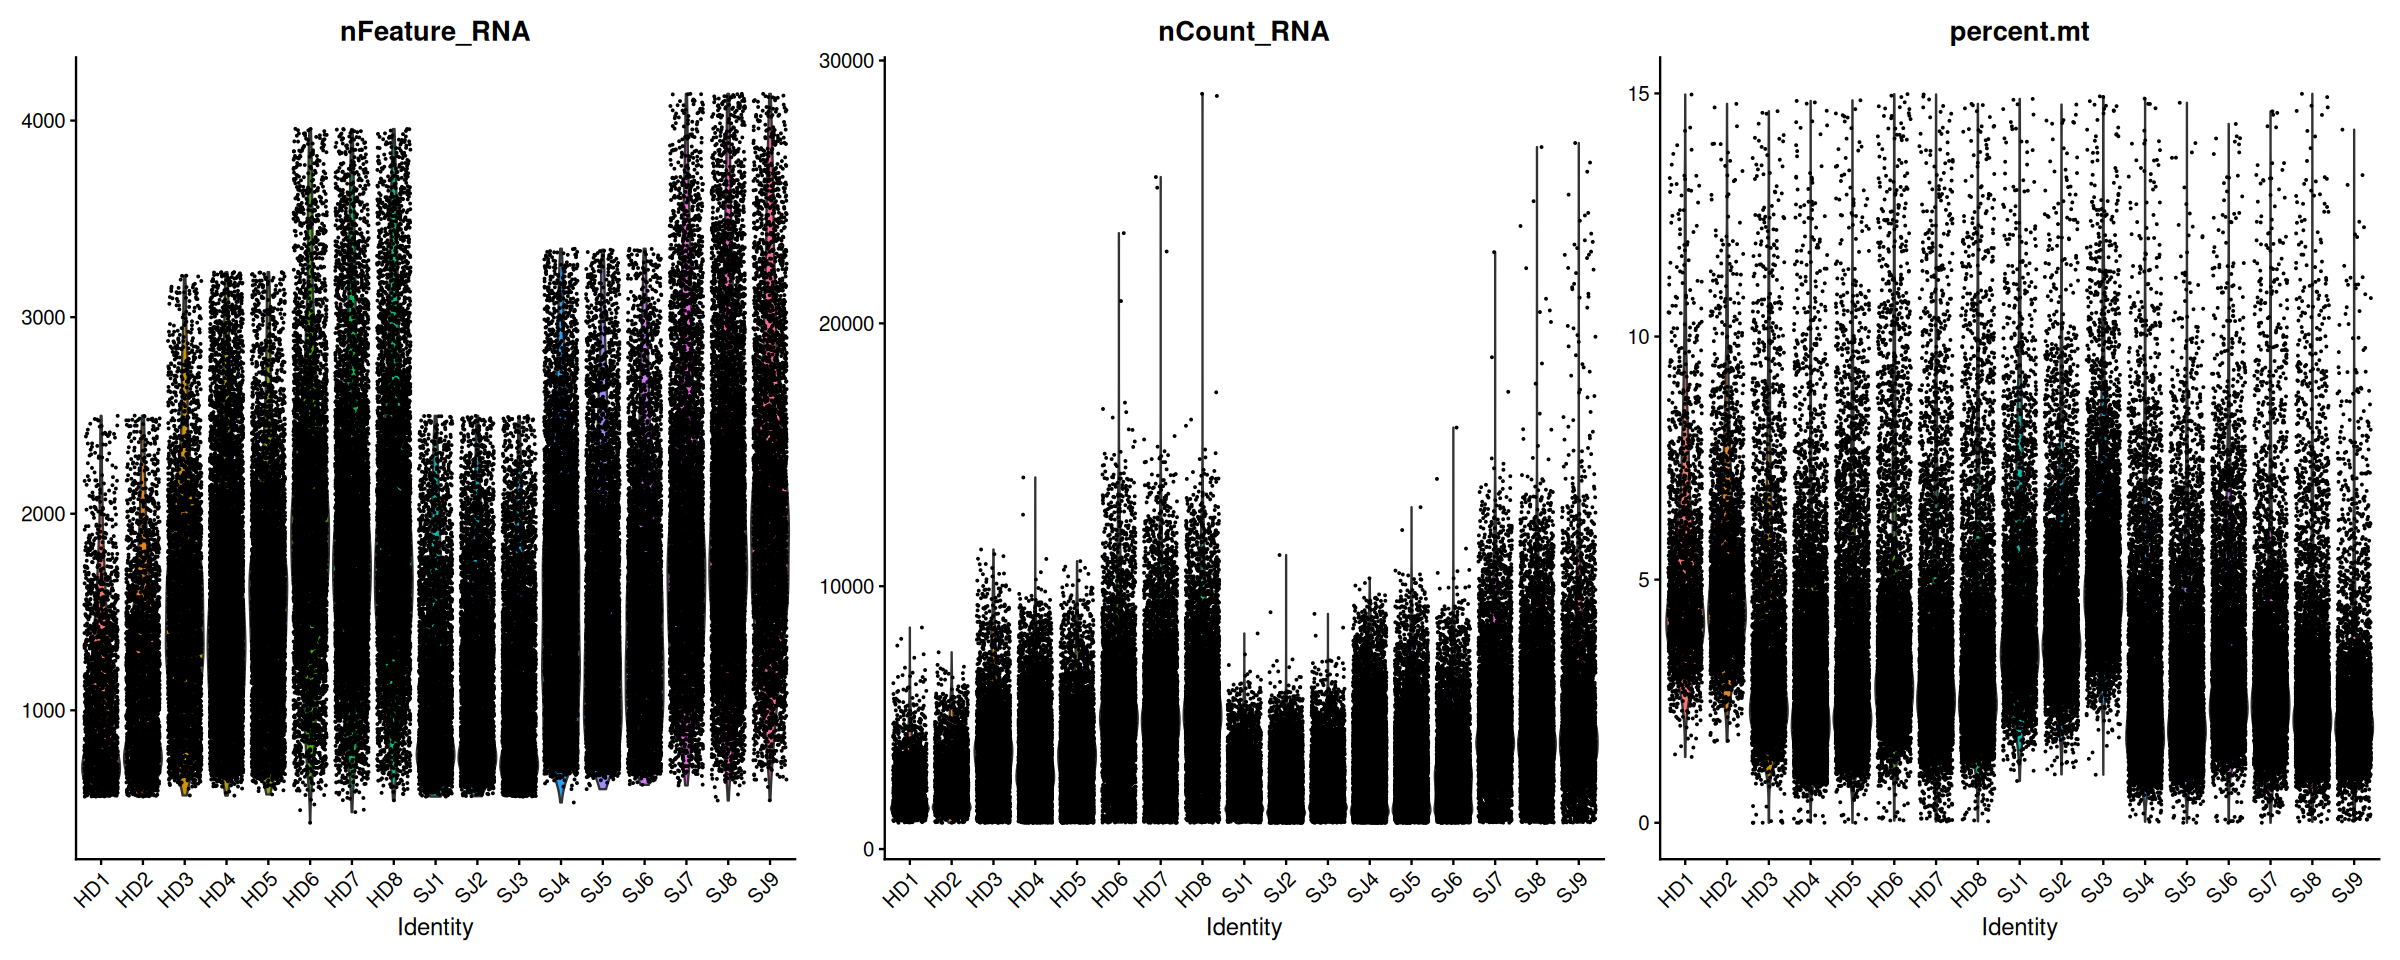

In [23]:
# compute the percent of mithochondrial genes
combined[["percent.mt"]] <- PercentageFeatureSet(combined, pattern = "^mt-|^MT-|^Mt") 

options(repr.plot.width = 20, repr.plot.height = 8)
VlnPlot(combined, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message in CombinePlots(plots = list(plot1, plot2)):
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


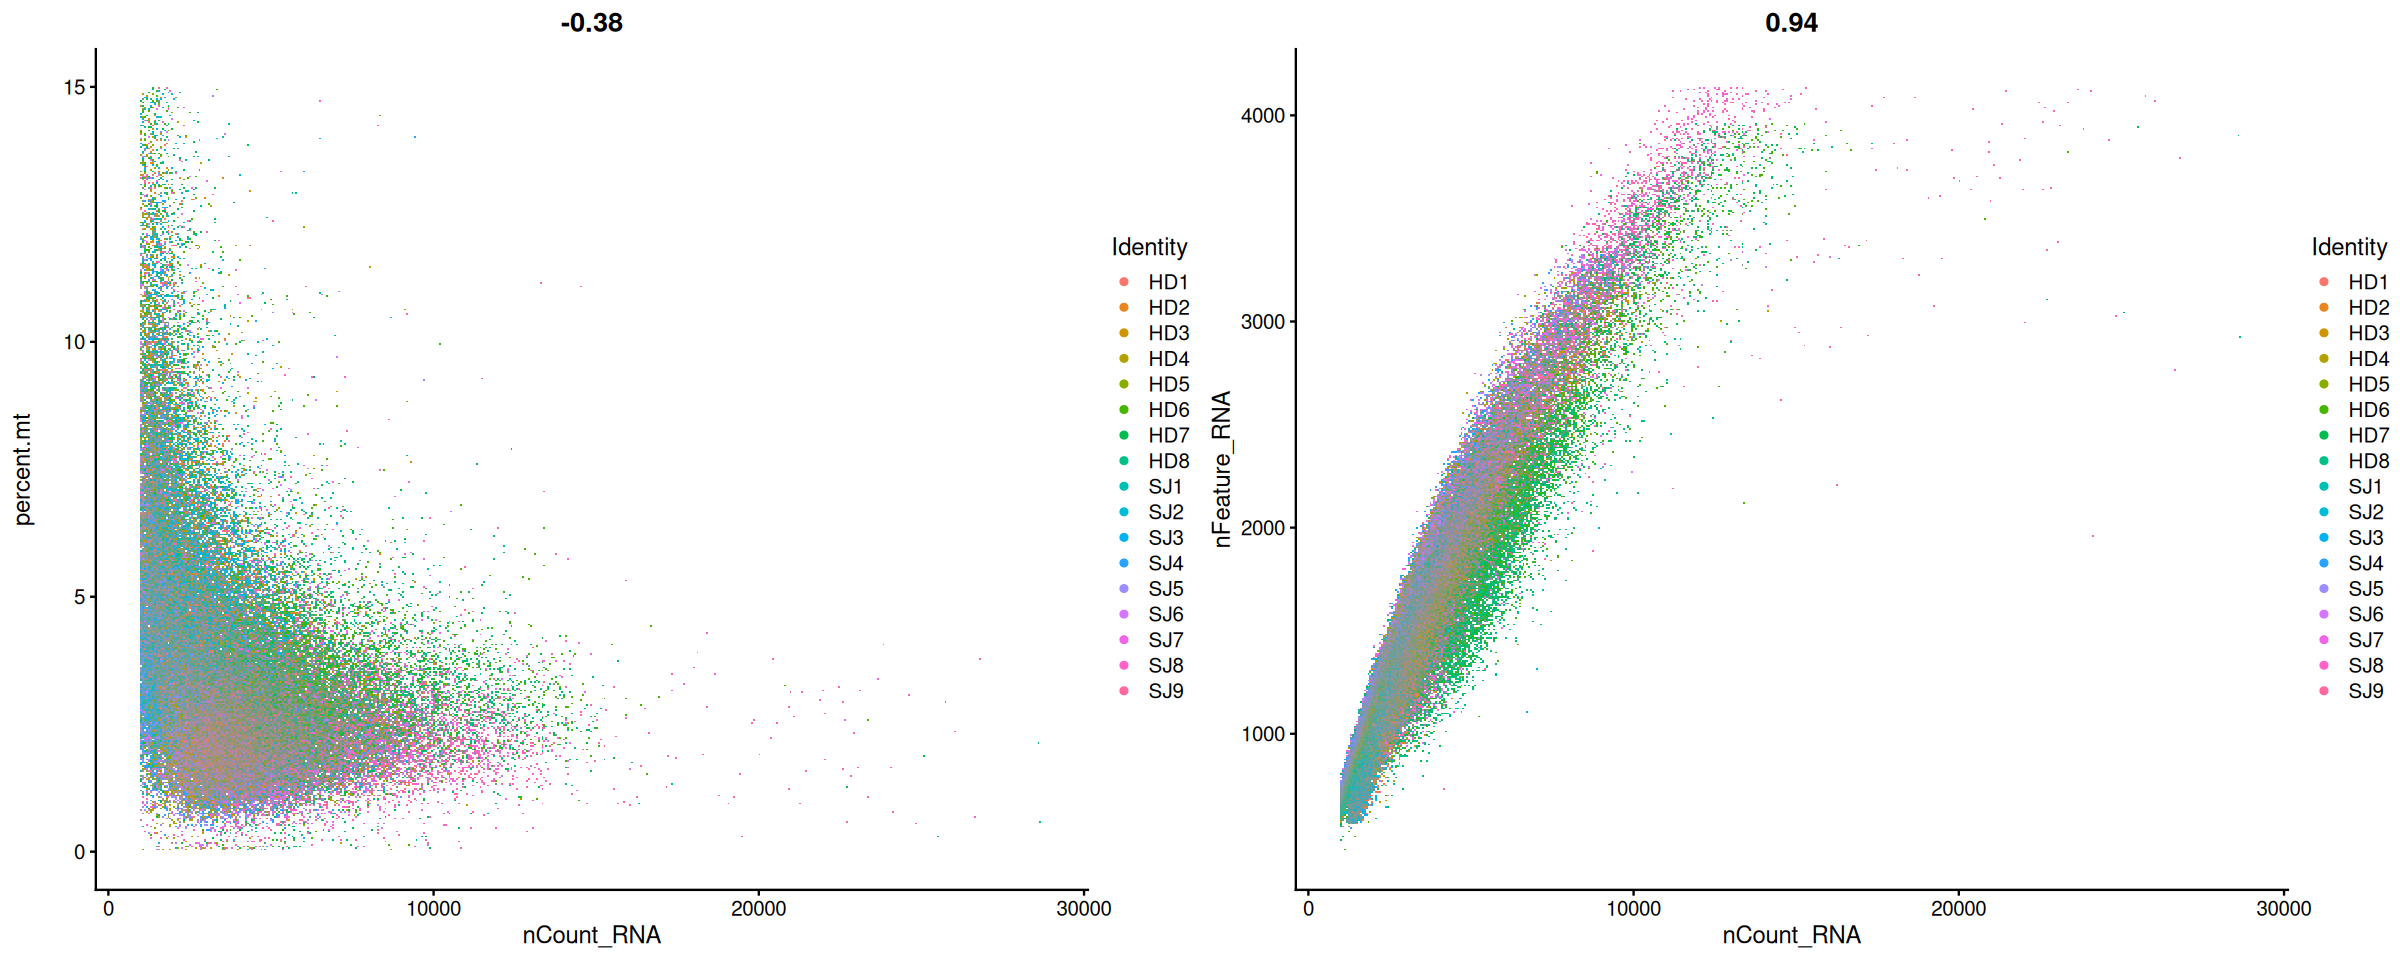

In [24]:
plot1 <- FeatureScatter(combined, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(combined, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

options(repr.plot.width = 20, repr.plot.height = 8)
CombinePlots(plots = list(plot1, plot2))

In [2]:
# Compute summary statistics
summary(combined@meta.data)

  orig.ident          nCount_RNA     nFeature_RNA     status         
 Length:105775      Min.   : 1001   Min.   : 428   Length:105775     
 Class :character   1st Qu.: 2244   1st Qu.:1133   Class :character  
 Mode  :character   Median : 3523   Median :1552   Mode  :character  
                    Mean   : 3939   Mean   :1641                     
                    3rd Qu.: 5050   3rd Qu.:2030                     
                    Max.   :28733   Max.   :4136                     
   percent.mt    
 Min.   : 0.000  
 1st Qu.: 2.127  
 Median : 3.013  
 Mean   : 3.555  
 3rd Qu.: 4.406  
 Max.   :14.992  

In [3]:
RESOLUTION = 0.3

In [7]:
combined <- NormalizeData(combined) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose = FALSE)

combined <- RunHarmony(combined, group.by.vars = "orig.ident")

Normalizing layer: counts.HD1.1

Normalizing layer: counts.HD2.1

Normalizing layer: counts.HD3.1

Normalizing layer: counts.HD4.1

Normalizing layer: counts.HD5.1

Normalizing layer: counts.HD6.1

Normalizing layer: counts.HD7.1

Normalizing layer: counts.HD8.1

Normalizing layer: counts.SJ1.2

Normalizing layer: counts.SJ2.2

Normalizing layer: counts.SJ3.2

Normalizing layer: counts.SJ4.2

Normalizing layer: counts.SJ5.2

Normalizing layer: counts.SJ6.2

Normalizing layer: counts.SJ7.2

Normalizing layer: counts.SJ8.2

Normalizing layer: counts.SJ9.2

Finding variable features for layer counts.HD1.1

Finding variable features for layer counts.HD2.1

Finding variable features for layer counts.HD3.1

Finding variable features for layer counts.HD4.1

Finding variable features for layer counts.HD5.1

Finding variable features for layer counts.HD6.1

Finding variable features for layer counts.HD7.1

Finding variable features for layer counts.HD8.1

Finding variable features for layer cou

In [8]:
combined <- RunUMAP(combined, reduction = "harmony", dims = 1:30)
combined <- RunTSNE(combined, reduction = "harmony", dims = 1:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
21:02:54 UMAP embedding parameters a = 0.9922 b = 1.112

21:02:54 Read 105775 rows and found 30 numeric columns

21:02:54 Using Annoy for neighbor search, n_neighbors = 30

21:02:54 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:03:00 Writing NN index file to temp file /tmp/Rtmp3GTSom/file40ee6bf2c3e9

21:03:00 Searching Annoy index using 1 thread, search_k = 3000

21:03:29 Annoy recall = 100%

21:03:29 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

In [9]:
Reductions(combined)

[1] "pca"     "harmony" "umap"    "tsne"

In [11]:
RESOLUTION = 0.3

In [12]:
combined <- FindNeighbors(combined, reduction = "harmony", dims = 1:30) %>% FindClusters(resolution = RESOLUTION)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 105775
Number of edges: 3335543

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9313
Number of communities: 15
Elapsed time: 28 seconds


In [1]:
# load(file = "sj.v7.RData")

In [8]:
head(combined@meta.data,3)
print("number of clusters")
table(combined@meta.data$seurat_clusters)

orig.ident nCount_RNA nFeature_RNA status
healthy_HD1_AAACCCACACACAGAG-1_1 HD1        1754        855         hd    
healthy_HD1_AAACCCAGTCGTCTCT-1_1 HD1        2961       1302         hd    
healthy_HD1_AAACCCATCGCTACAA-1_1 HD1        1606        664         hd    
                                 percent.mt RNA_snn_res.0.3 seurat_clusters
healthy_HD1_AAACCCACACACAGAG-1_1 5.530217   1               1              
healthy_HD1_AAACCCAGTCGTCTCT-1_1 6.146572   1               1              
healthy_HD1_AAACCCATCGCTACAA-1_1 4.109589   0               0

[1] "number of clusters"



    0     1     2     3     4     5     6     7     8     9    10    11    12 
20813 17249 15117 10489 10170  8561  8440  4181  4147  3740  2047   251   239 
   13    14 
  200   131 

[1] "Visualization using PCA :"


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



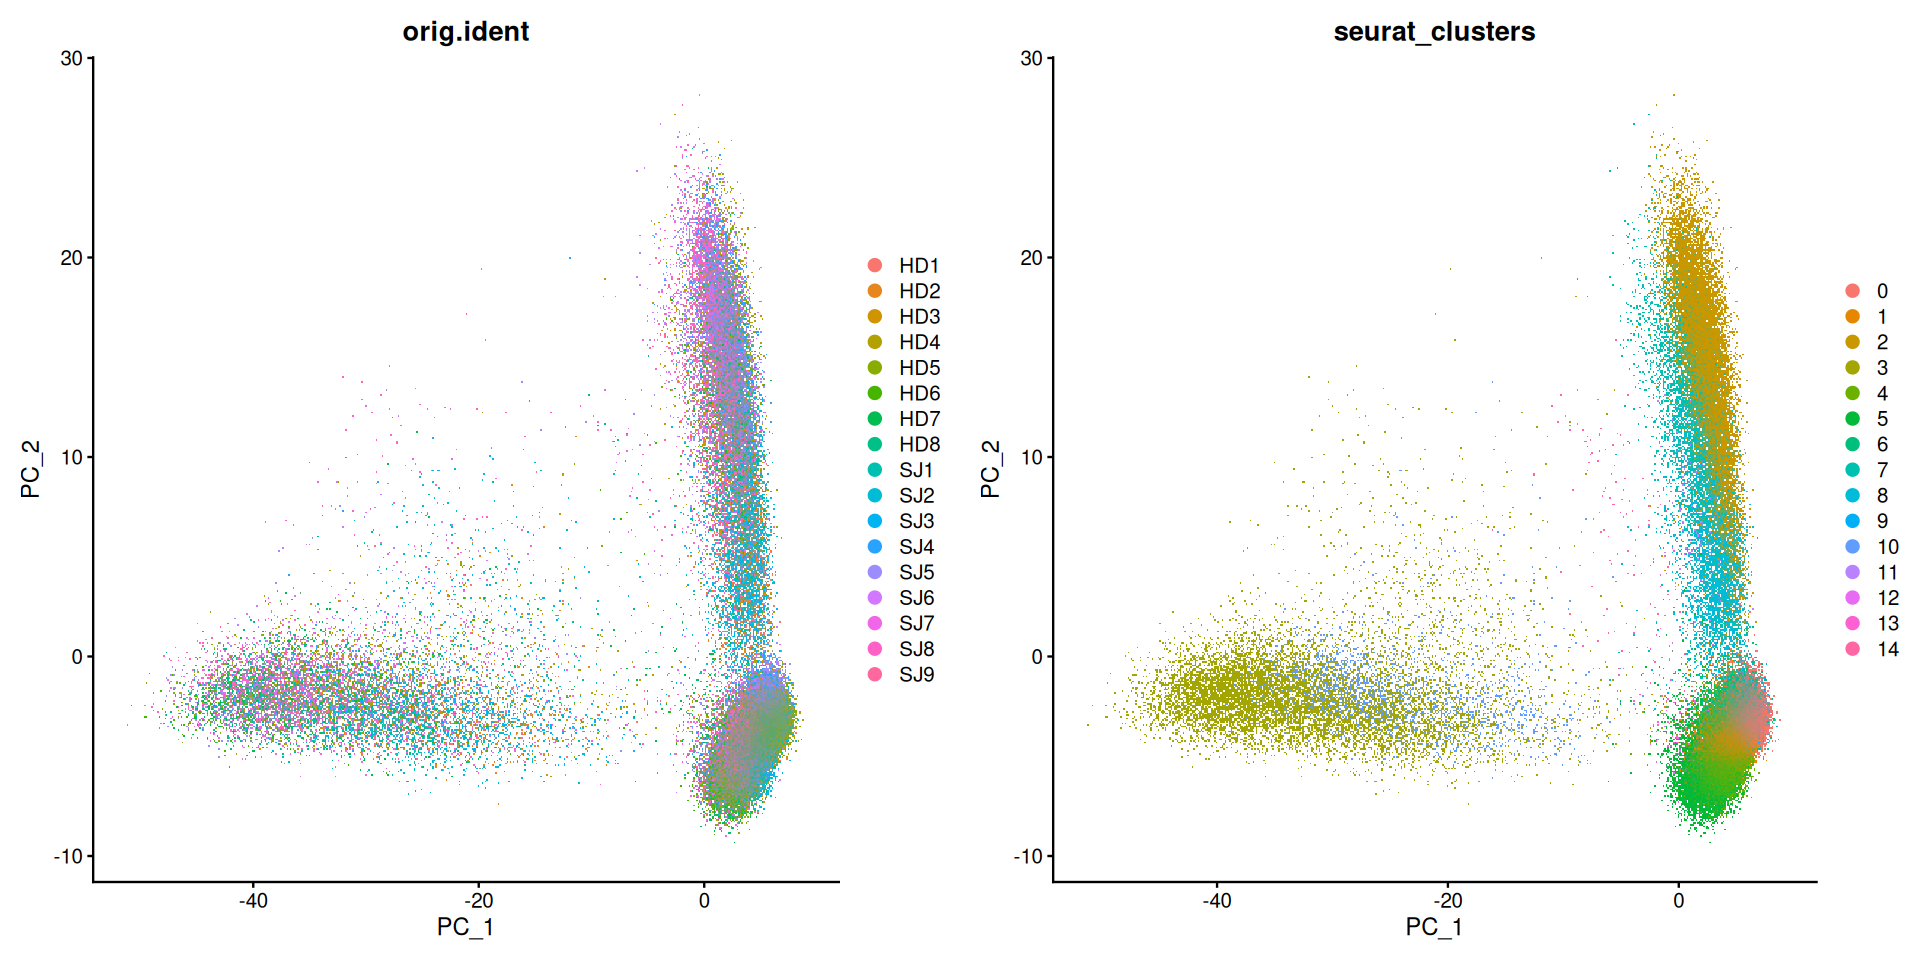

In [9]:
print("Visualization using PCA :")
options(repr.plot.width = 16, repr.plot.height = 8)
p1 <- DimPlot(combined, reduction = "pca", group.by = "orig.ident")
p2 <- DimPlot(combined, reduction = "pca", group.by = c("seurat_clusters"))
plot_grid(p1, p2)

# print("Visualization using HARMONY :")
# options(repr.plot.width = 22, repr.plot.height = 8)
# p1 <- DimPlot(combined, reduction = "harmony", group.by = "orig.ident")
# p2 <- DimPlot(combined, reduction = "harmony", group.by = "seurat_clusters")
# plot_grid(p1, p2)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



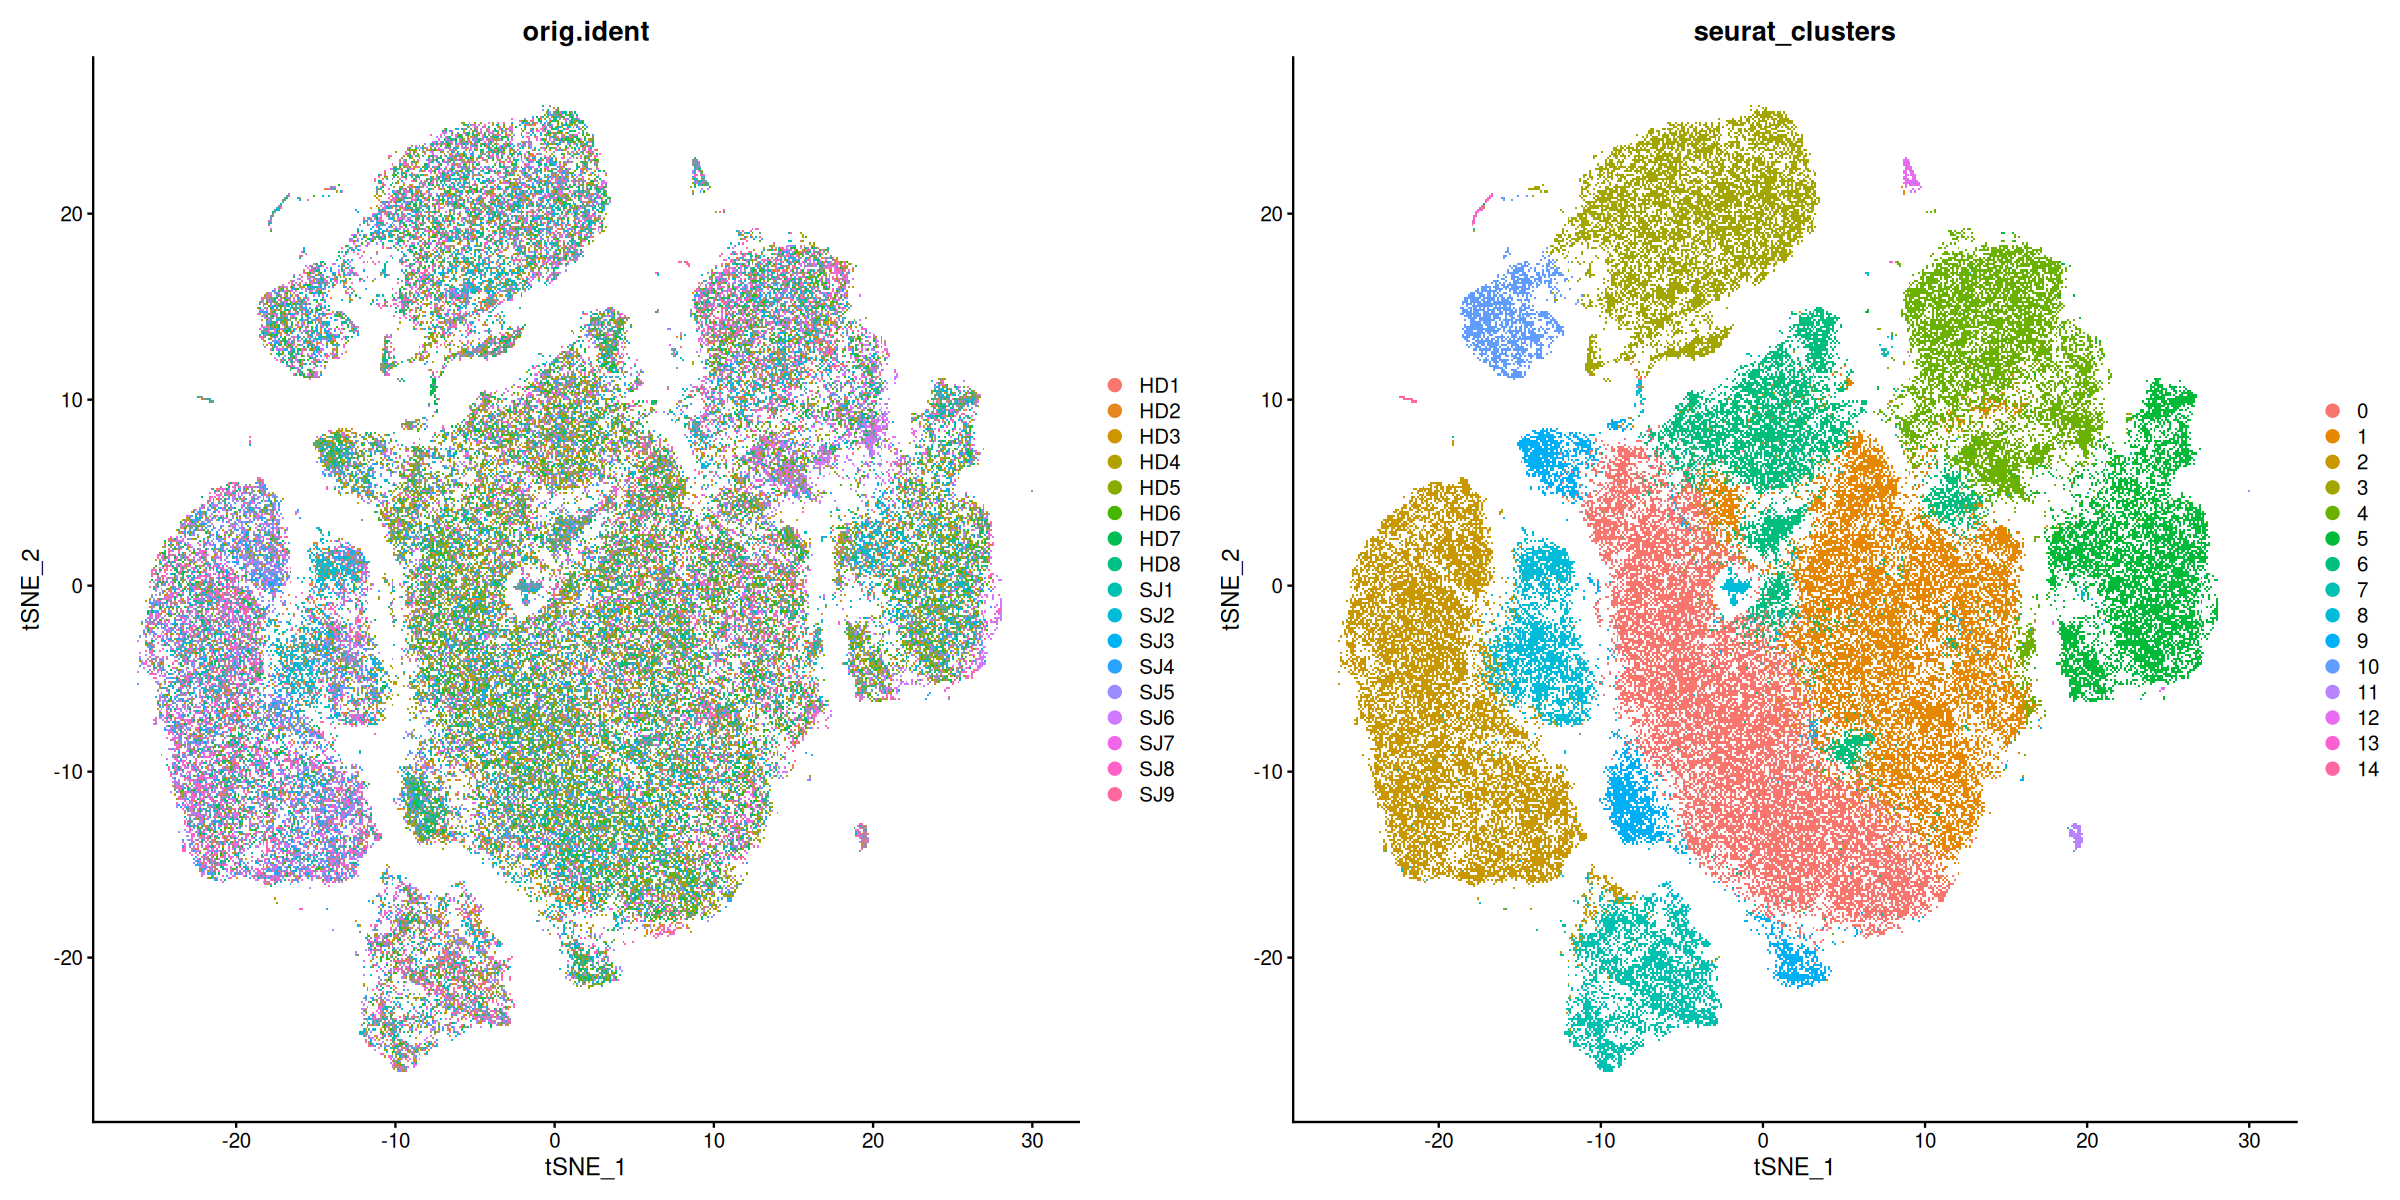

In [10]:
# Visualization using tSNE :

options(repr.plot.width = 20, repr.plot.height = 10)
p1 <- DimPlot(combined, reduction = "tsne", group.by = "orig.ident")
p2 <- DimPlot(combined, reduction = "tsne", group.by = "seurat_clusters")
plot_grid(p1, p2)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



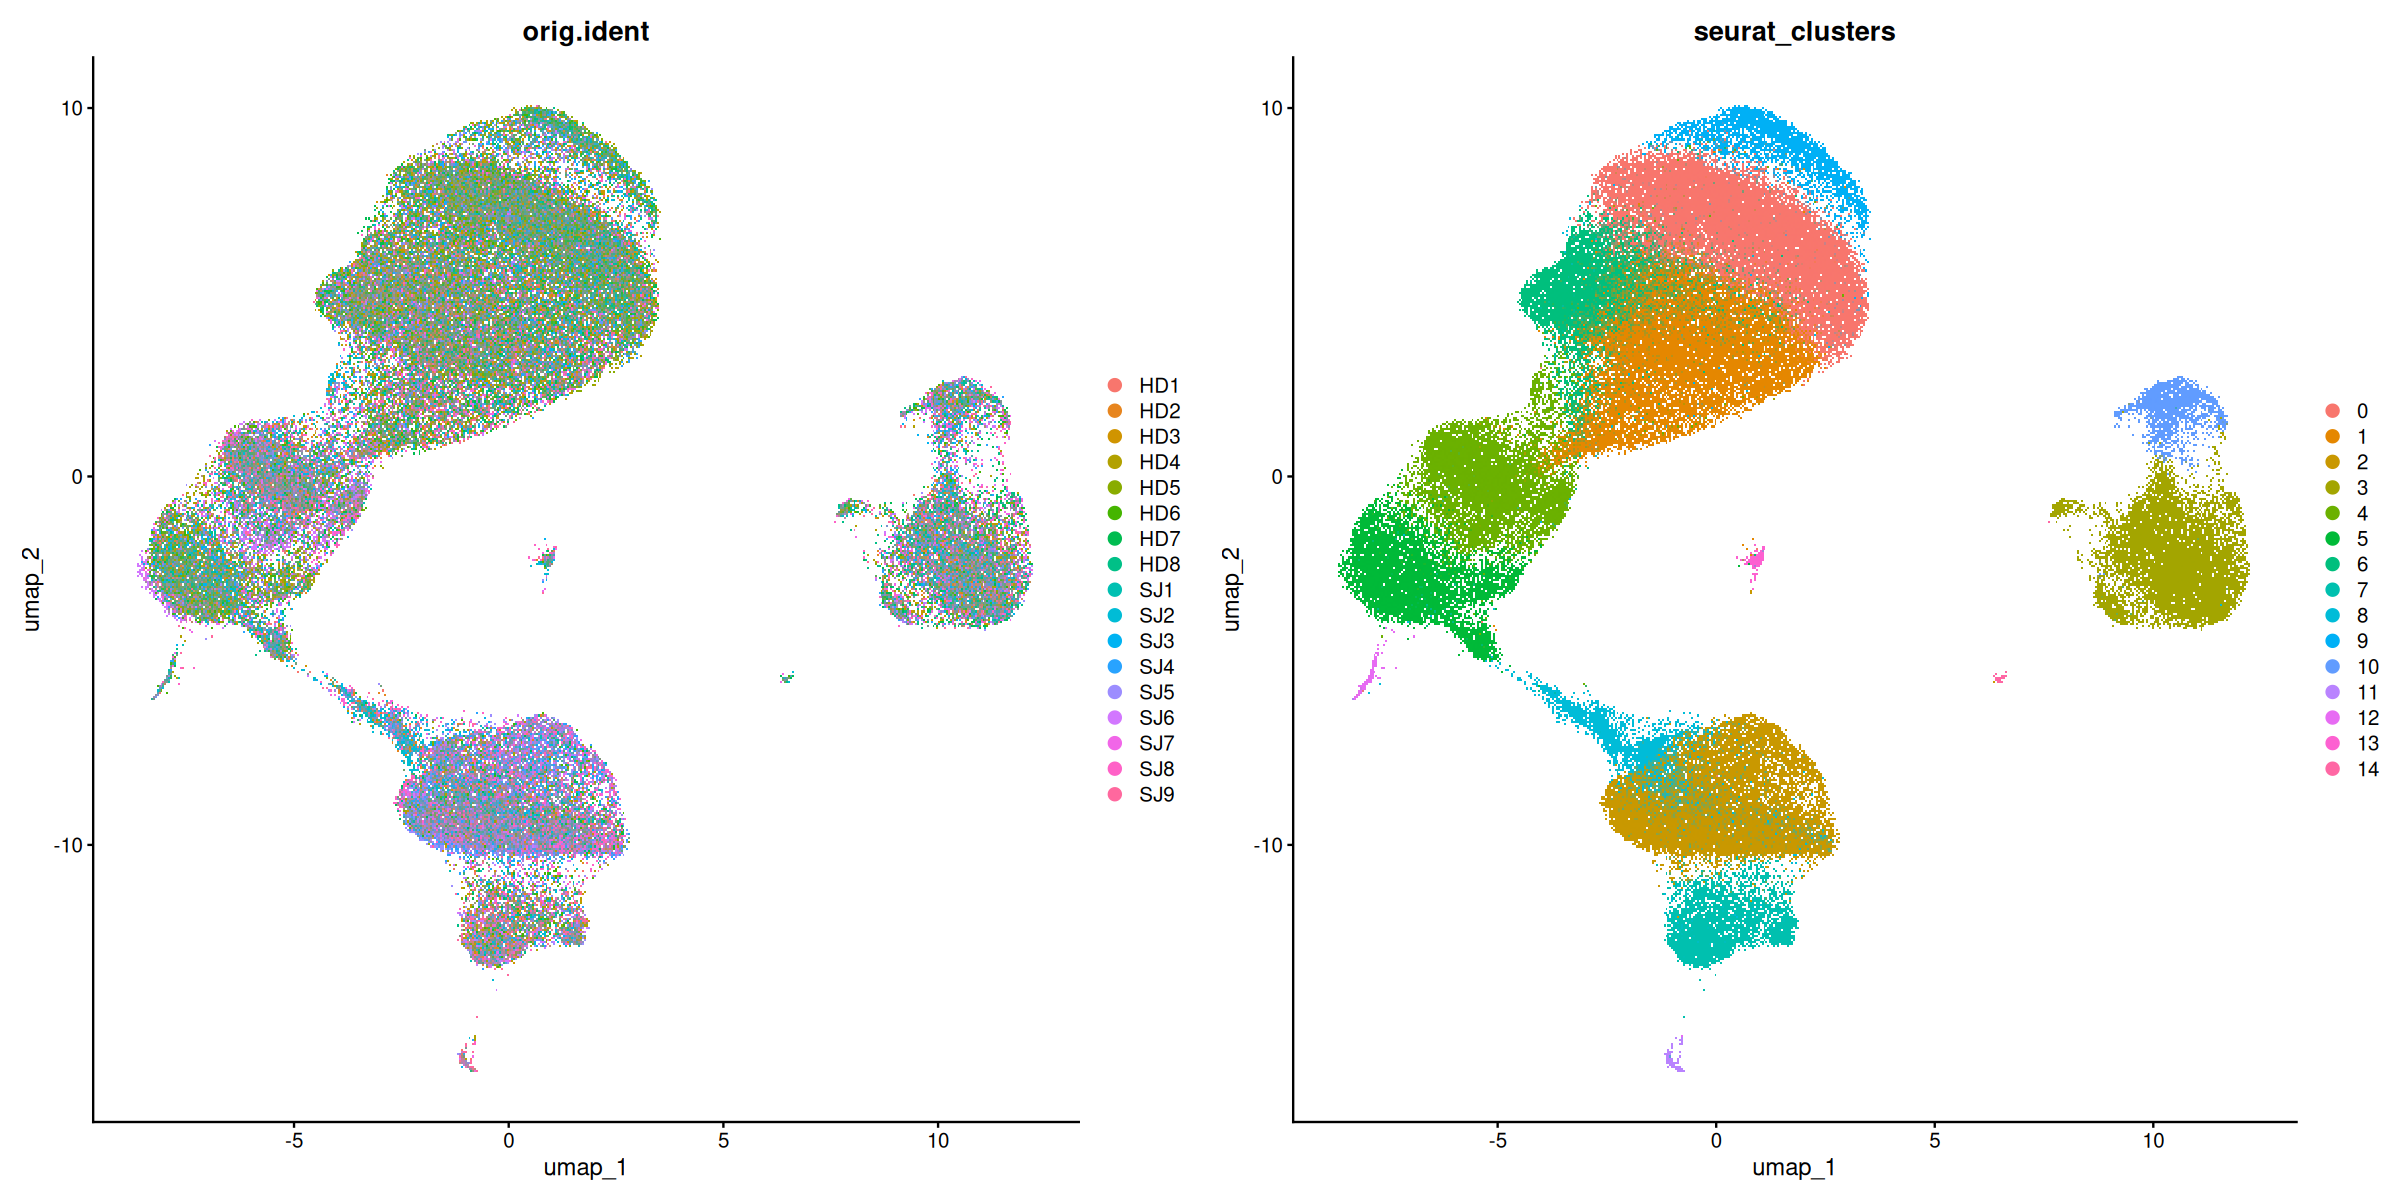

In [11]:
# Visualization using UMAP :

options(repr.plot.width = 20, repr.plot.height = 10)
p1 <- DimPlot(combined, reduction = "umap", group.by = "orig.ident")
p2 <- DimPlot(combined, reduction = "umap", group.by = "seurat_clusters")
plot_grid(p1, p2)

[1] "T-reg specific markers"


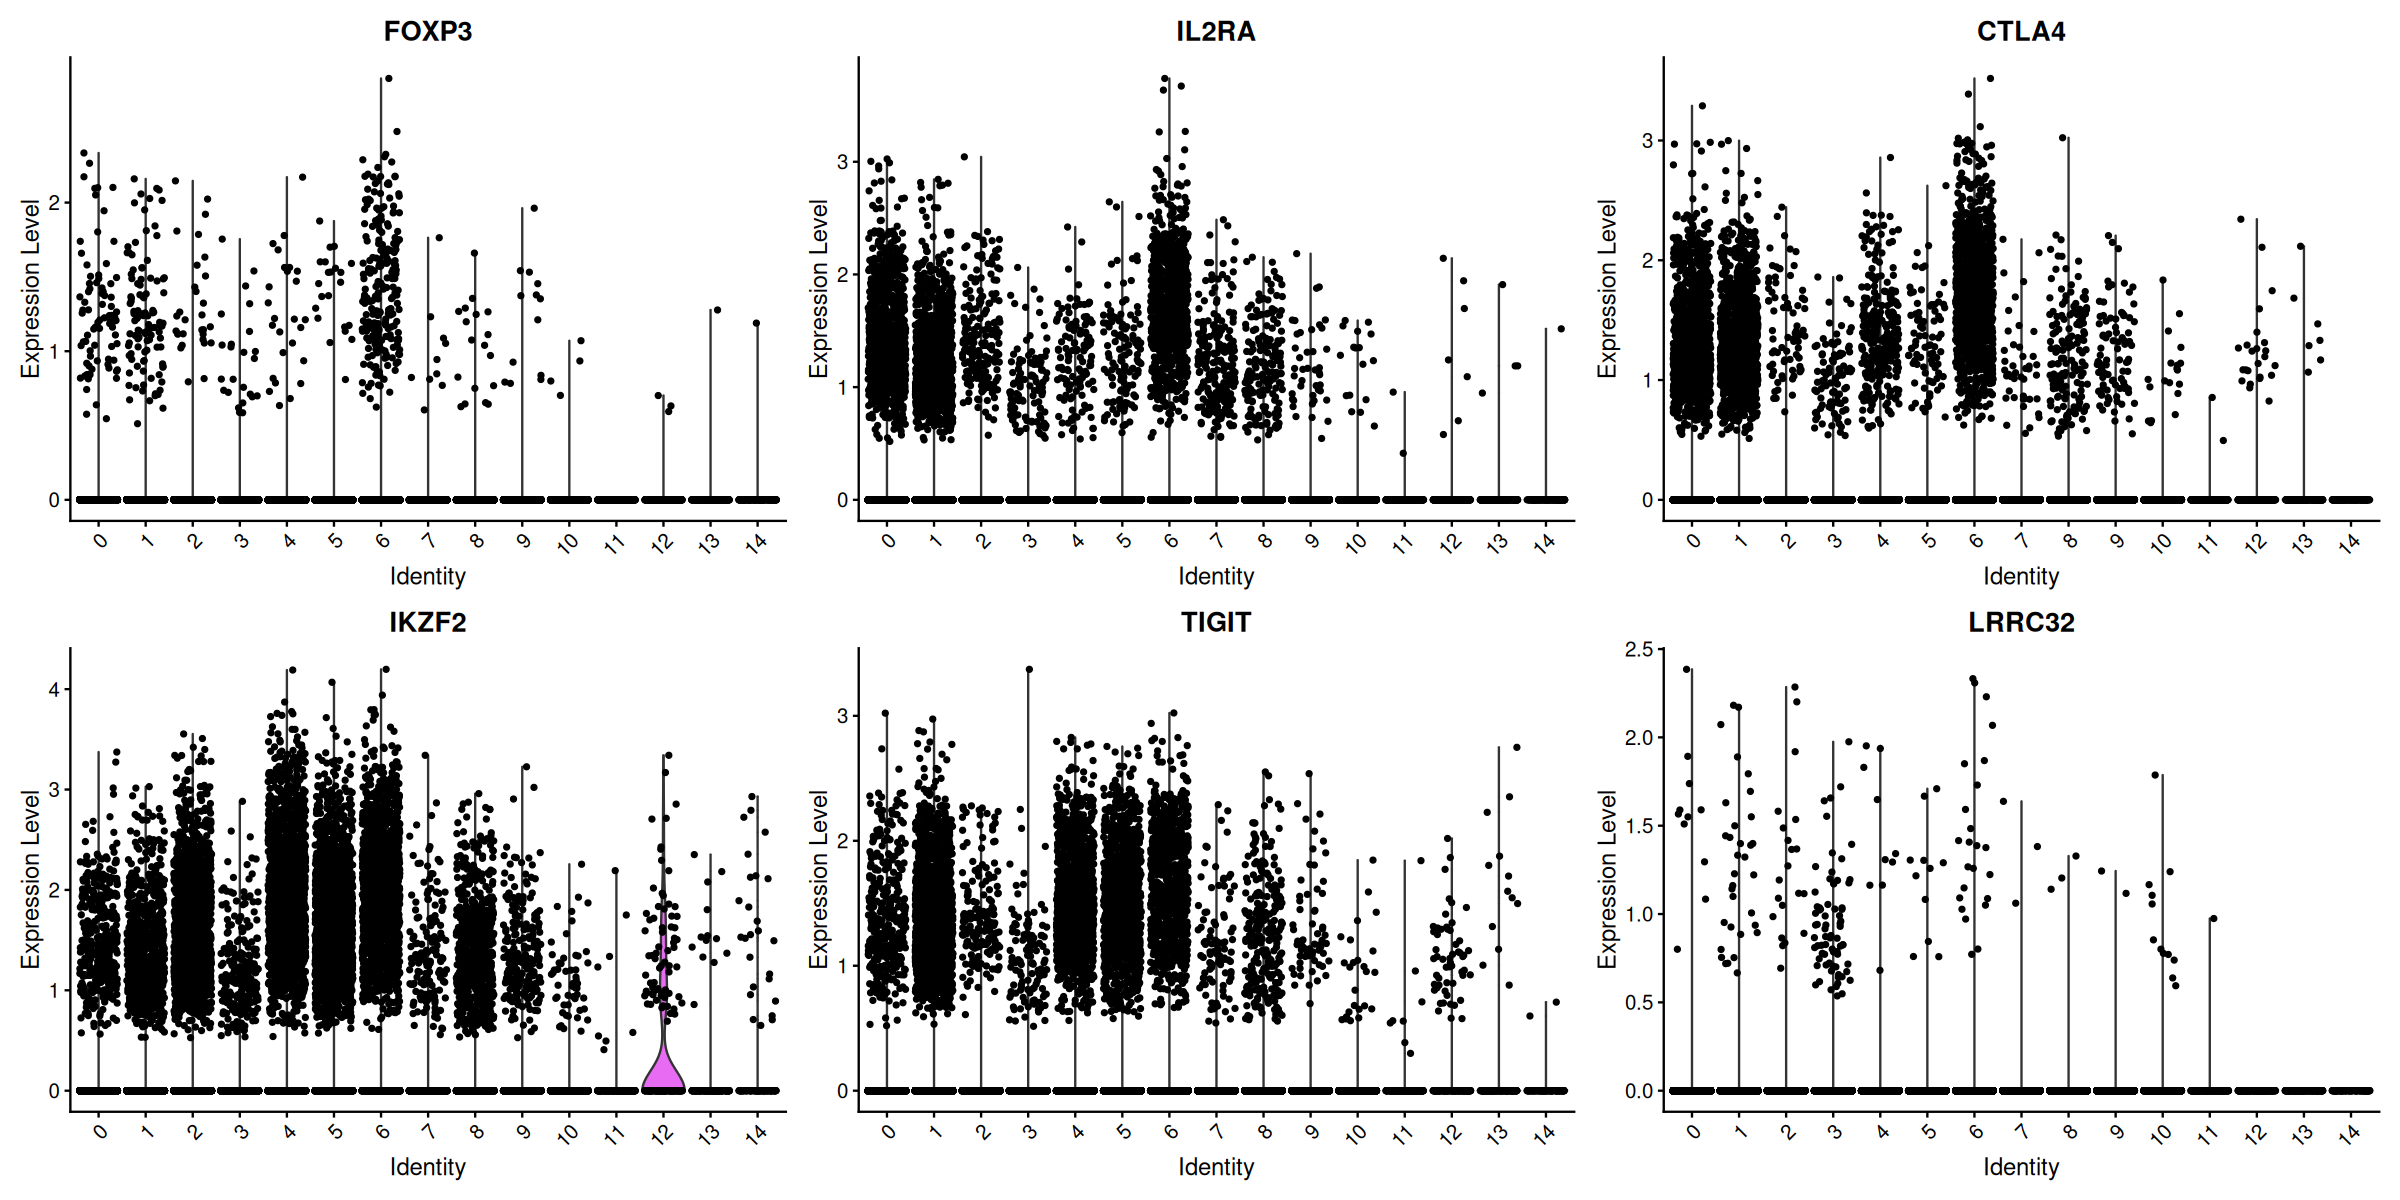

In [13]:
print("T-reg specific markers")

VlnPlot(combined, features = c("FOXP3", "IL2RA", "CTLA4", "IKZF2", "TIGIT", "LRRC32"), pt.size = 1)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



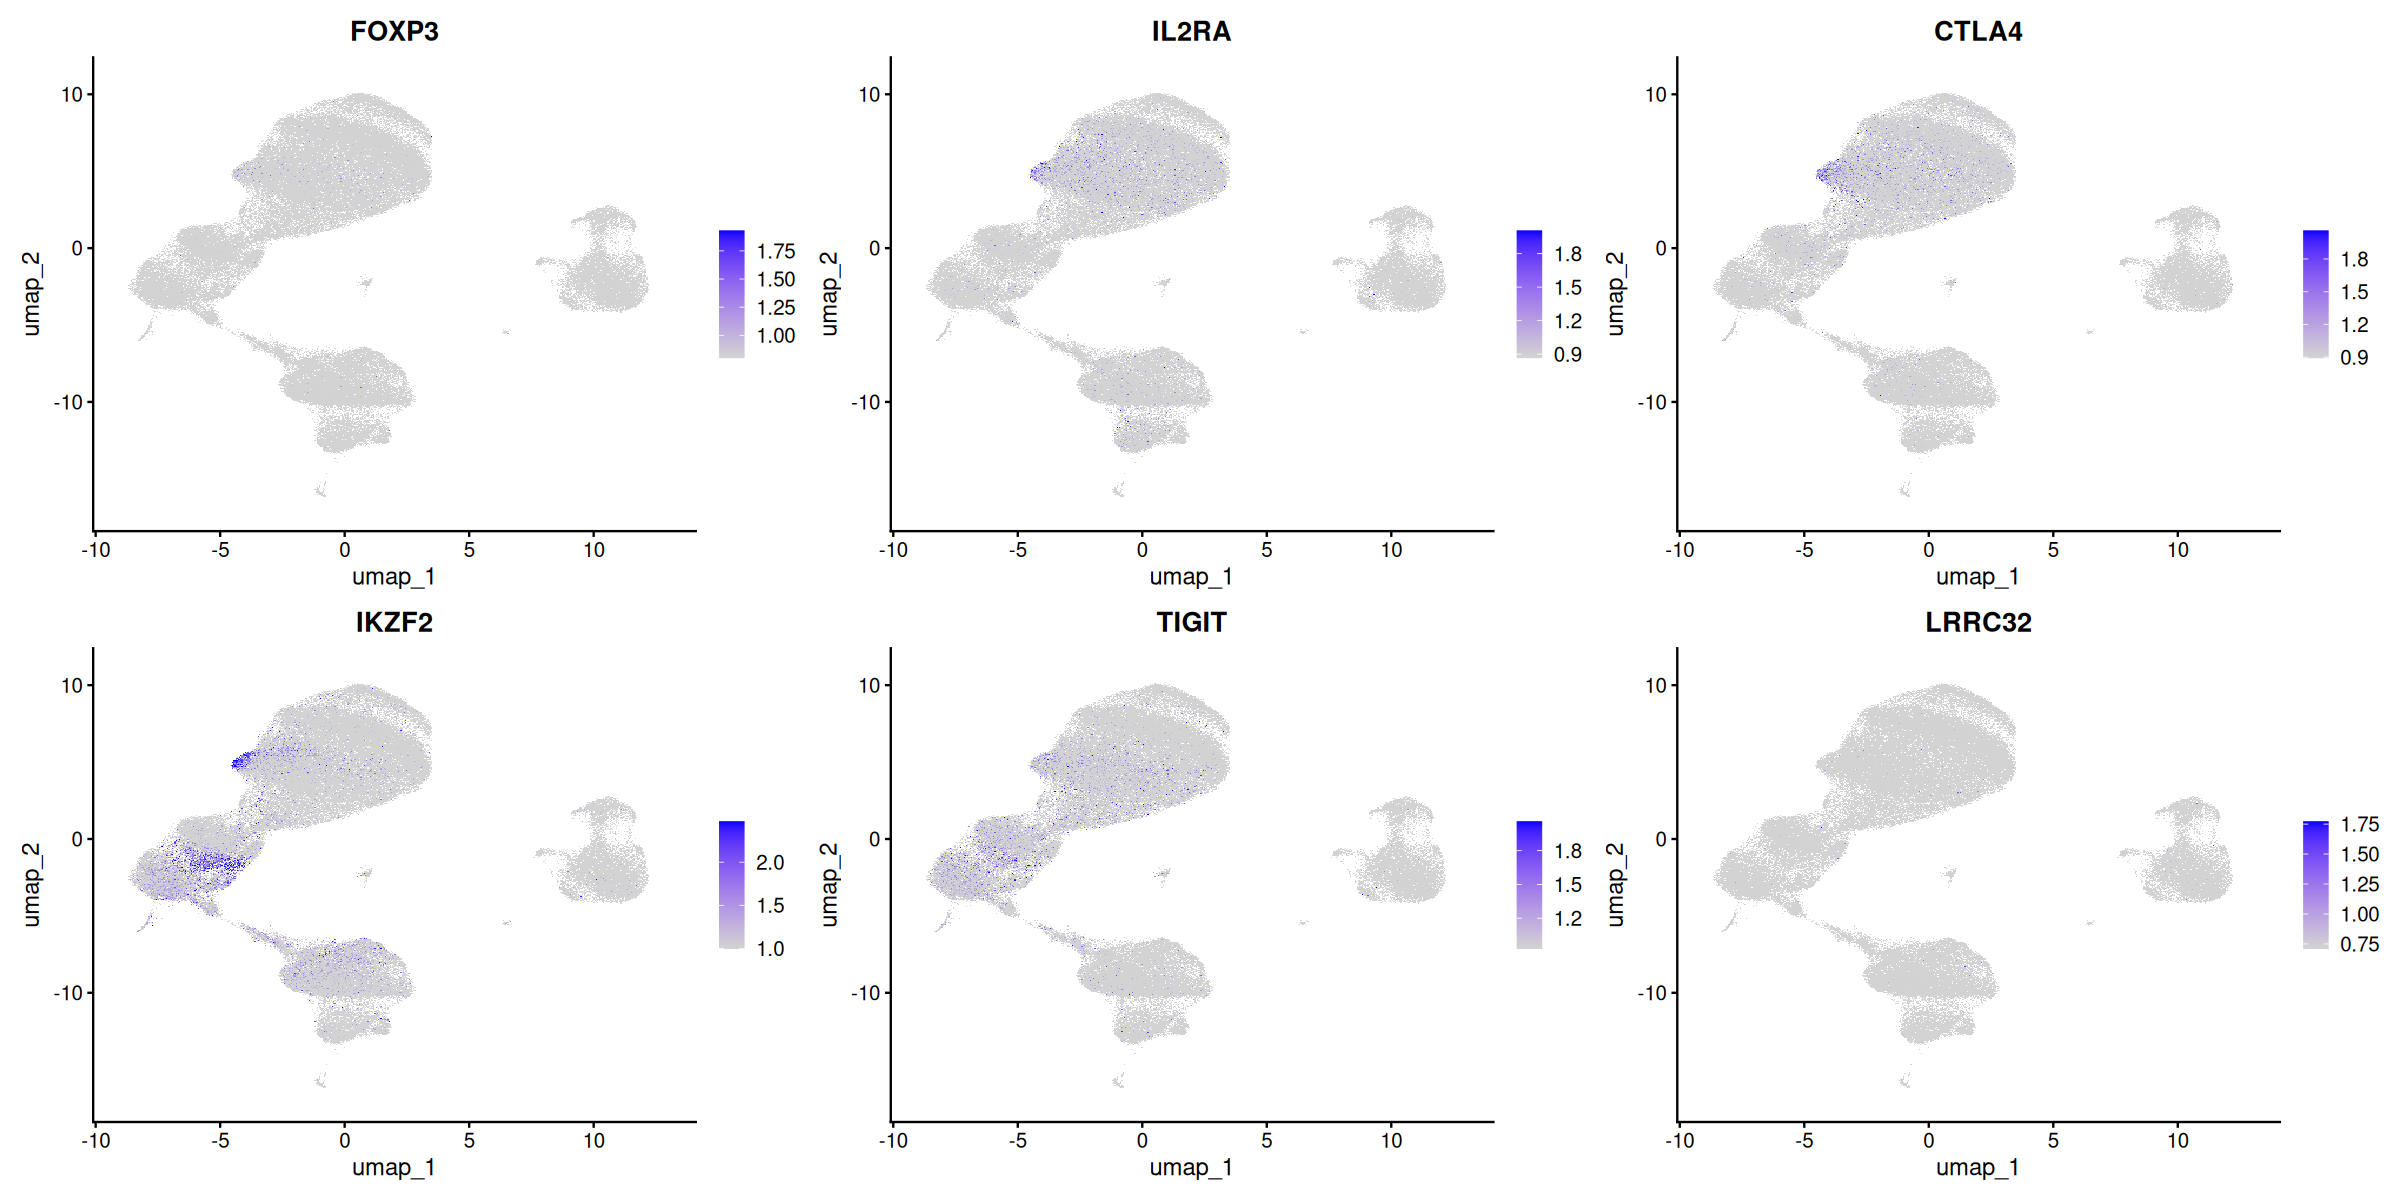

In [14]:
fp <- FeaturePlot(
  combined,
  features = c("FOXP3", "IL2RA", "CTLA4", "IKZF2", "TIGIT", "LRRC32"),
  reduction = "umap",
  pt.size = 1,
  order = TRUE,
  min.cutoff = "q10",
  max.cutoff = "q90"
)

fp[[1]] + fp[[2]] + fp[[3]] +
fp[[4]] + fp[[5]] + fp[[6]] +
          plot_layout(ncol = 3)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



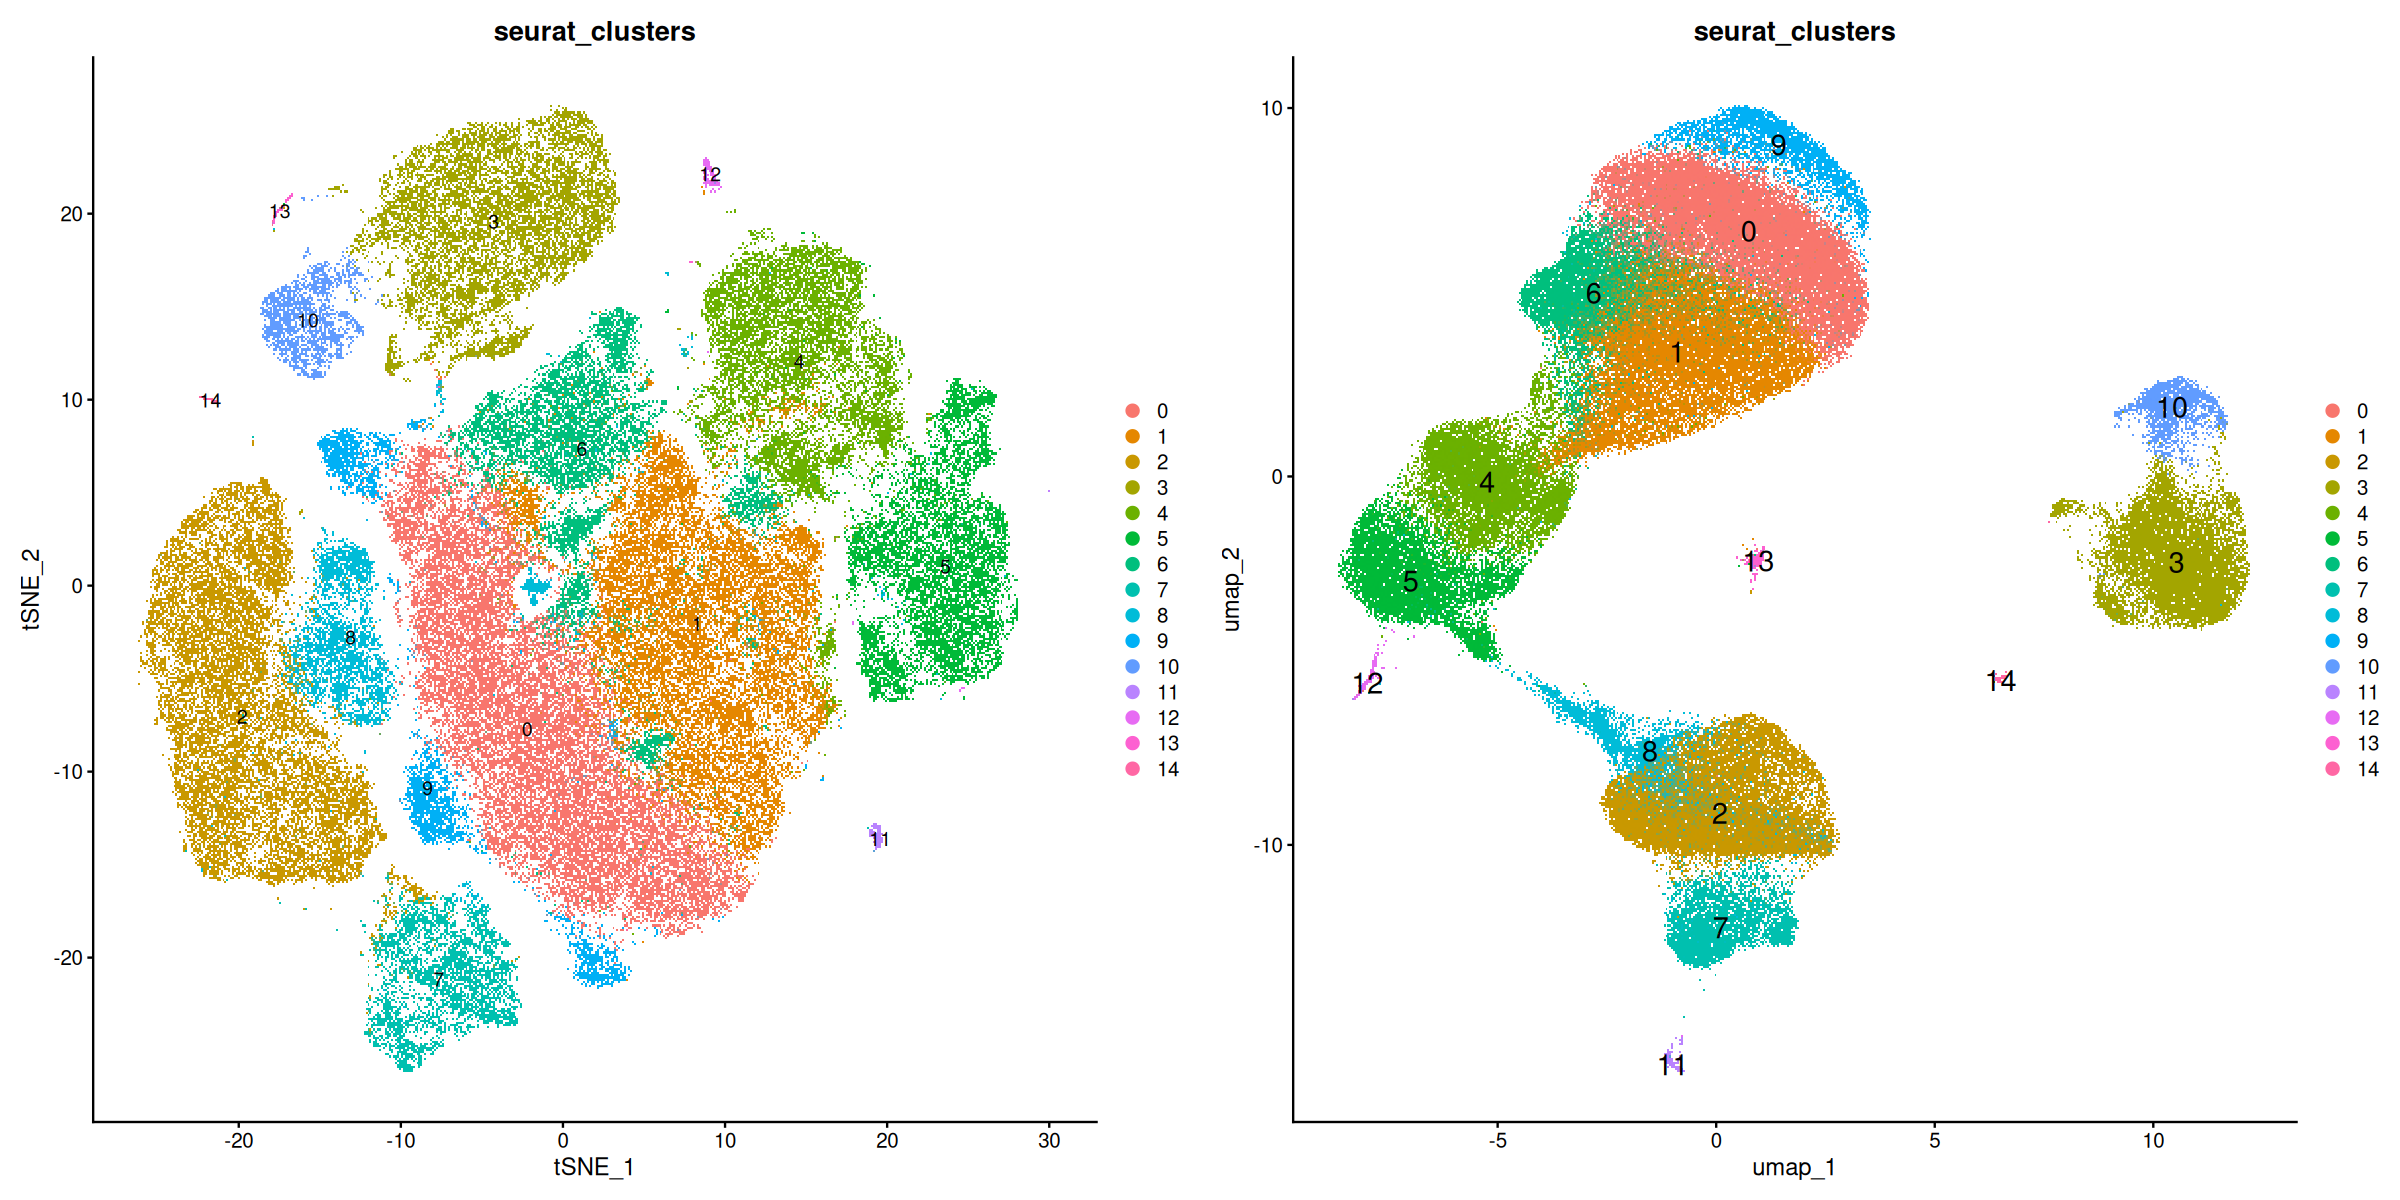

In [17]:
options(repr.plot.width = 20, repr.plot.height = 10)
p1 <- DimPlot(combined, reduction = "tsne", group.by = "seurat_clusters", label = TRUE)
p2 <- DimPlot(combined, reduction = "umap", group.by = "seurat_clusters", label = TRUE, label.size = 6)
plot_grid(p1, p2)

In [ ]:
head(combined@meta.data, 2)

In [18]:
print("Based on the expression of markers such as FOXP3, IL2RA, CTLA4, IKZF2, TIGIT, and LRRC32, we infer that cluster 6 likely 
      represents regulatory T cells (Tregs). However, a more comprehensive analysis should include automated cell type annotation 
      methods such as SingleR, CellTypist, Azimuth, or scmap for greater confidence.")

[1] "Based on the expression of markers such as FOXP3, IL2RA, CTLA4, IKZF2, TIGIT, and LRRC32, we infer that cluster 6 likely \n      represents regulatory T cells (Tregs). However, a more comprehensive analysis should include automated cell type annotation \n      methods such as SingleR, CellTypist, Azimuth, or scmap for greater confidence."


In [ ]:
print("Computing the differential expression bewteen HD and SJ only for cluster 6")

In [19]:
# selecting Cluster 6
Idents(combined) <- "seurat_clusters"

cluster6 <- WhichCells(combined, idents = "6")
cluster6o <- subset(combined, cells = cluster6)
Idents(cluster6o) <- "status"

cluster6o <- JoinLayers(cluster6o)
# ident.1 = "sj" is the test group
# ident.2 = "hd" is the reference group
cluster6_markers <- FindMarkers(
  cluster6o,
  ident.1 = "sj",
  ident.2 = "hd",
  min.pct = 0.1,
  logfc.threshold = 0.25,
  test.use = "wilcox"
)

In [20]:
head(cluster6_markers, 4)

p_val         avg_log2FC pct.1 pct.2 p_val_adj    
IFI44L  0.000000e+00 3.658522   0.367 0.039  0.000000e+00
EPSTI1 3.613027e-134 1.674567   0.373 0.148 1.322404e-129
IFI44  1.319862e-120 2.213329   0.255 0.072 4.830825e-116
IGKC   5.130434e-119 1.531289   0.446 0.229 1.877790e-114

In [24]:
# Define significance threshold and subset the significant genes

sig <- 0.05
logfc <- 0.25

sig_genes <- subset(cluster6_markers, p_val_adj < sig & abs(avg_log2FC) > logfc)
up <- sum(sig_genes$avg_log2FC > logfc)
down <- sum(sig_genes$avg_log2FC < -logfc)

cat("Significantly upregulated genes in sj vs hd:", up, "\n")
cat("Significantly downregulated genes in sj vs hd:", down, "\n")

# cat("top 10 up-regulated genes")
head(sig_genes[order(-sig_genes$avg_log2FC), ], 5)

# cat("top 10 down-regulated genes")
head(sig_genes[order(sig_genes$avg_log2FC), ], 5)

Significantly upregulated genes in sj vs hd: 162 
Significantly downregulated genes in sj vs hd: 136 


p_val         avg_log2FC pct.1 pct.2 p_val_adj    
IFI44L  0.000000e+00 3.658522   0.367 0.039  0.000000e+00
IFI44  1.319862e-120 2.213329   0.255 0.072 4.830825e-116
DLGAP1  2.669774e-38 2.183649   0.126 0.049  9.771639e-34
ISG15   1.184385e-64 2.182015   0.155 0.046  4.334967e-60
IGLC3   1.699027e-51 2.150949   0.103 0.025  6.218607e-47

p_val        avg_log2FC pct.1 pct.2 p_val_adj   
AL589693.1 2.647355e-48 -1.2420059 0.129 0.250 9.689585e-44
RGCC       2.581427e-37 -1.1635220 0.138 0.243 9.448279e-33
TOB1       3.845018e-20 -0.9702636 0.082 0.146 1.407315e-15
HSPH1      3.319611e-11 -0.8512170 0.085 0.128 1.215011e-06
JUN        7.348123e-51 -0.8085902 0.360 0.499 2.689487e-46

In [25]:
# re-order the table print the results

sig_genes$gene <- rownames(sig_genes)
head(sig_genes)

sig_genes$direction <- ifelse(sig_genes$avg_log2FC > 0, "up sj", "down sj")
sig_table <- sig_genes[, c("gene", "avg_log2FC", "p_val_adj", "pct.1", "pct.2", "direction")]
sig_table <- sig_table[order(sig_table$avg_log2FC, decreasing = TRUE), ]

write.csv(sig_table, "cluster6_DE_genes_sj_vs_hd.csv", row.names = FALSE)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     gene  
IFI44L  0.000000e+00  3.6585217 0.367 0.039  0.000000e+00 IFI44L
EPSTI1 3.613027e-134  1.6745675 0.373 0.148 1.322404e-129 EPSTI1
IFI44  1.319862e-120  2.2133289 0.255 0.072 4.830825e-116 IFI44 
IGKC   5.130434e-119  1.5312887 0.446 0.229 1.877790e-114 IGKC  
MT-CYB 6.914937e-118 -0.5174094 0.982 0.995 2.530936e-113 MT-CYB
MX1    1.465740e-104  1.9735471 0.238 0.071 5.364754e-100 MX1

In [26]:
print("The number of differentially expressed genes in cluster 6 bewteen Healthy Donors and Sjogren Patients is :")
dim(sig_genes)

[1] "the number of differentially expressed genes in cluster 6 bewteen Healthy Donors and Sjogren Patients is :"


[1] 298   7

In [30]:
print(paste("Over-representation and Gene Set Enrichment analysis for", nrow(sig_genes), "genes"))

[1] "Over-representation and Gene Set Enrichment analysis for 298 genes"


In [34]:
print("The analysis with the package clusterprofiler")

[1] "The analysis with the package clusterprofiler"


In [35]:
library(clusterProfiler)
library(org.Hs.eg.db) 
library(GO.db)         
library(DO.db)         
library(KEGGREST)      
library(ReactomePA)    
library(enrichplot)    
library(dplyr)
library(msigdbr)
library(msigdb)
library(msigdf)
library(msigdbdf)

In [37]:
gene_list = sig_genes$gene
# head(gene_list)
filtered = sig_genes
# head(filtered)

In [41]:
# Convert gene names to Entrez IDs
gene_ids <- bitr(gene_list, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = org.Hs.eg.db)
# head(gene_ids, 2)
gene_list_merged <- merge(gene_ids, filtered, by.x = "SYMBOL", by.y = "gene")
# head(gene_list_merged, 2)
fin_name = "cluster6_DE_genes_sj_vs_hd.clusterprofiler"

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(gene_list, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = org.Hs.eg.db):
“10.07% of input gene IDs are fail to map...”


In [42]:
gene_list2 <- setNames(gene_list_merged$avg_log2FC, gene_list_merged$ENTREZID)
gene_list2 <- sort(gene_list2, decreasing = TRUE)
head(gene_list2, 2)

10964    10561 
3.658522 2.213329

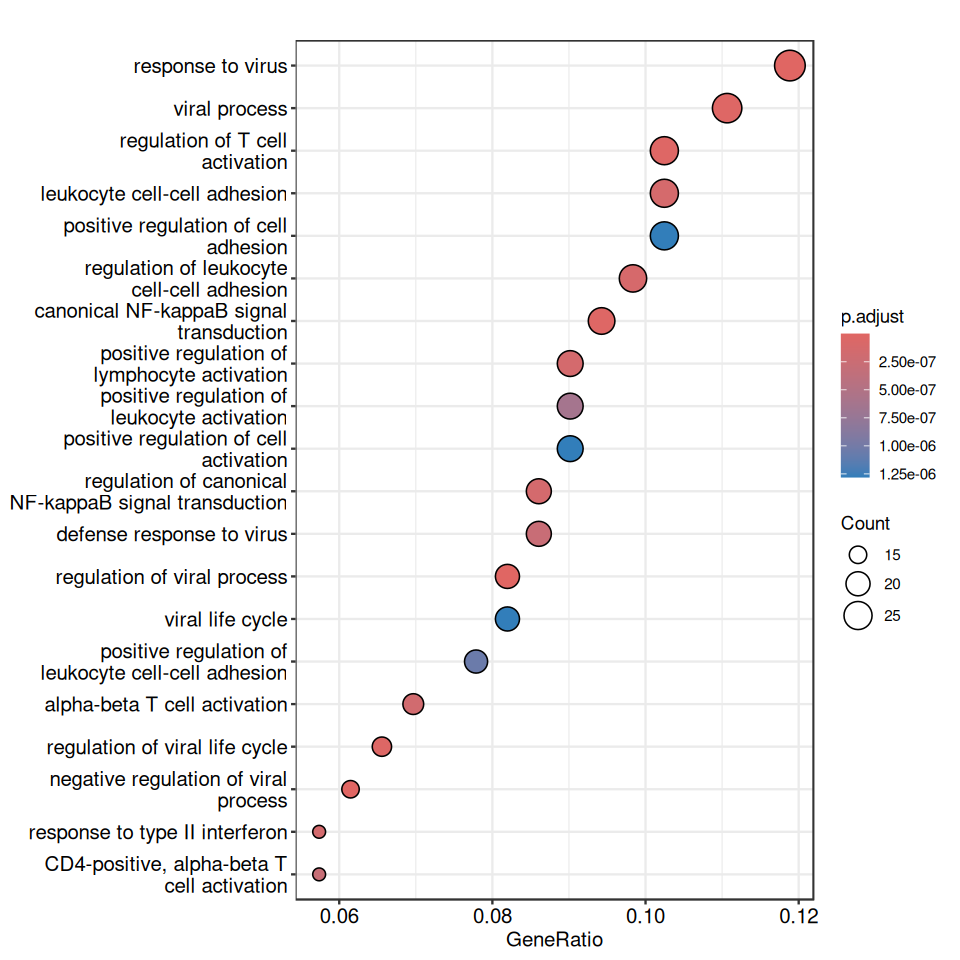

In [47]:
# GO Over-Representation Analysis

result <- tryCatch({

  ego <- enrichGO(gene          = gene_ids$ENTREZID,
                  OrgDb         = org.Hs.eg.db,
                  ont           = "BP",
                  keyType       = "ENTREZID",  
                  pAdjustMethod = "BH",
                  pvalueCutoff  = 0.05,
                  qvalueCutoff  = 1,
                  readable      = TRUE)
  
  # Save results (using the result slot for consistency)
  write.table(ego@result, file = paste0(fin_name, "_GO_OverRepresentation_Results.txt"), 
              row.names = FALSE, col.names = TRUE, quote = FALSE)
  
  png(paste0(fin_name, "_GO_OverRepresentation.png"), width = 1000, height = 800)
  print(dotplot(ego, showCategory = 20))
  dev.off()
  
  # Display plot interactively
  # print(dotplot(ego, showCategory = 20))
  
}, error = function(e) {
  cat("An error occurred in GO over-representation analysis:", conditionMessage(e), "\n")
})

options(repr.plot.width = 8, repr.plot.height = 8)
print(dotplot(ego, showCategory = 20))

using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“There were 1 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
leading edge analysis...

done...



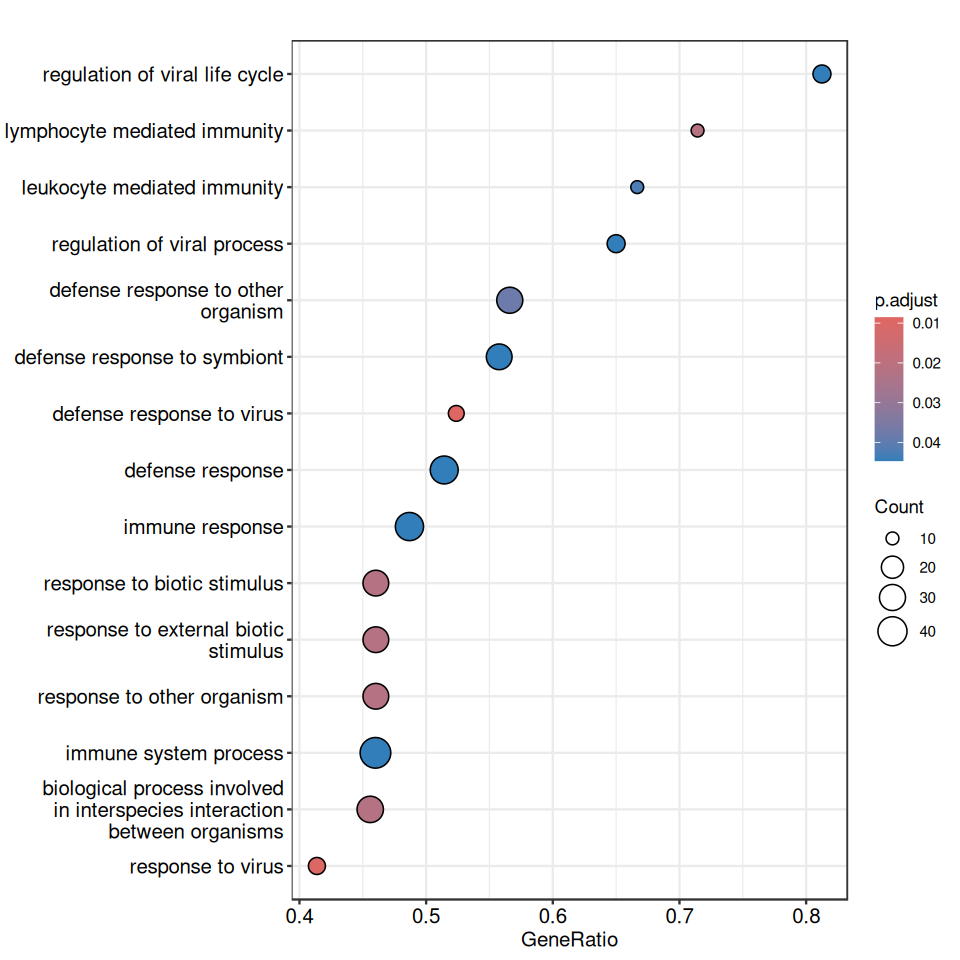

In [48]:
# GO Enrichment Analysis (GSEA)

result2 <- tryCatch({

  ego2 <- gseGO(gene = gene_list2,
                OrgDb = org.Hs.eg.db,
                keyType = "ENTREZID",  
                ont = "BP",      # Biological Process
                pAdjustMethod = "BH",
                pvalueCutoff = 0.05)
  
  write.table(ego2@result, file = paste0(fin_name, "_GO_Enrichment_Results.txt"), 
              row.names = FALSE, col.names = TRUE, quote = FALSE)
  
  png(paste0(fin_name, "_GO_Enrichment_Plot.png"), width = 1000, height = 800)
  print(dotplot(ego2, showCategory = 20))
  dev.off()
  
  # print(dotplot(ego2, showCategory = 20))
  
}, error = function(e) {
  cat("An error occurred in GO enrichment analysis:", conditionMessage(e), "\n")
})

options(repr.plot.width = 8, repr.plot.height = 8)
print(dotplot(ego2, showCategory = 20))

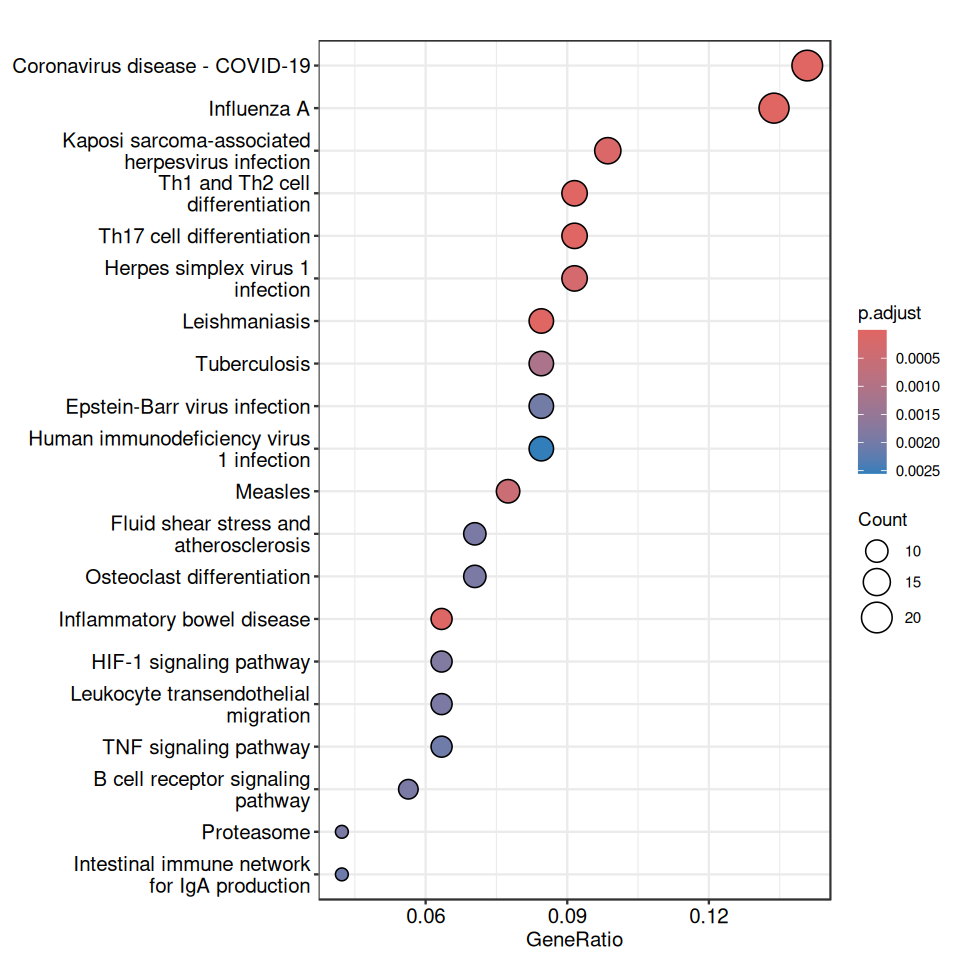

In [51]:
# KEGG Over-Representation Analysis

result <- tryCatch({

  kegg_enrich <- enrichKEGG(gene = gene_ids$ENTREZID,
                            organism = "hsa",  
                            pAdjustMethod = "BH",
                            pvalueCutoff = 0.05)
    
  if (nrow(kegg_enrich@result) > 0) {
    # print(dotplot(kegg_enrich, showCategory = 20))
    write.table(kegg_enrich@result, 
                file = paste0(fin_name, "_KEGG_OverRepresentation_Results.txt"), 
                sep = "\t", row.names = FALSE, quote = FALSE)
    
    png(paste0(fin_name, "_KEGG_OverRepresentation_Plot.png"), width = 600, height = 600)
    print(dotplot(kegg_enrich, showCategory = 20))
    dev.off()
    
  } else {
    cat("No enriched KEGG terms found. Please adjust your parameters.\n")
  }
  
}, error = function(e) {
  cat("An error occurred during KEGG over-representation analysis:", conditionMessage(e), "\n")
})

options(repr.plot.width = 8, repr.plot.height = 8)
print(dotplot(kegg_enrich, showCategory = 20))

In [55]:
# KEGG Gene Set Enrichment Analysis

result2 <- tryCatch({
    
  kegg_gse <- gseKEGG(geneList   = gene_list2,
                      organism     = 'hsa',
                      minGSSize    = 10,
                      pvalueCutoff = 0.2,
                      verbose      = FALSE)
  
  if (nrow(kegg_gse@result) > 0) {
    # print(dotplot(kegg_gse, showCategory = 20))
    write.table(kegg_gse@result, "KEGG_Enrichment_Results.txt", sep = "\t", row.names = FALSE, quote = FALSE)
    
    png(paste0(fin_name, "_KEGG_Enrichment_Plot.png"), width = 600, height = 600)
    print(dotplot(kegg_gse, showCategory = 20))
    dev.off()
    
  } else {
    cat("No enriched KEGG terms found. Please adjust your parameters.\n")
  }
  
}, error = function(e) {
  cat("An error occurred during KEGG GSEA analysis:", conditionMessage(e), "\n")
})

# options(repr.plot.width = 8, repr.plot.height = 8)
# print(dotplot(kegg_gse, showCategory = 20))

no term enriched under specific pvalueCutoff...



No enriched KEGG terms found. Please adjust your parameters.


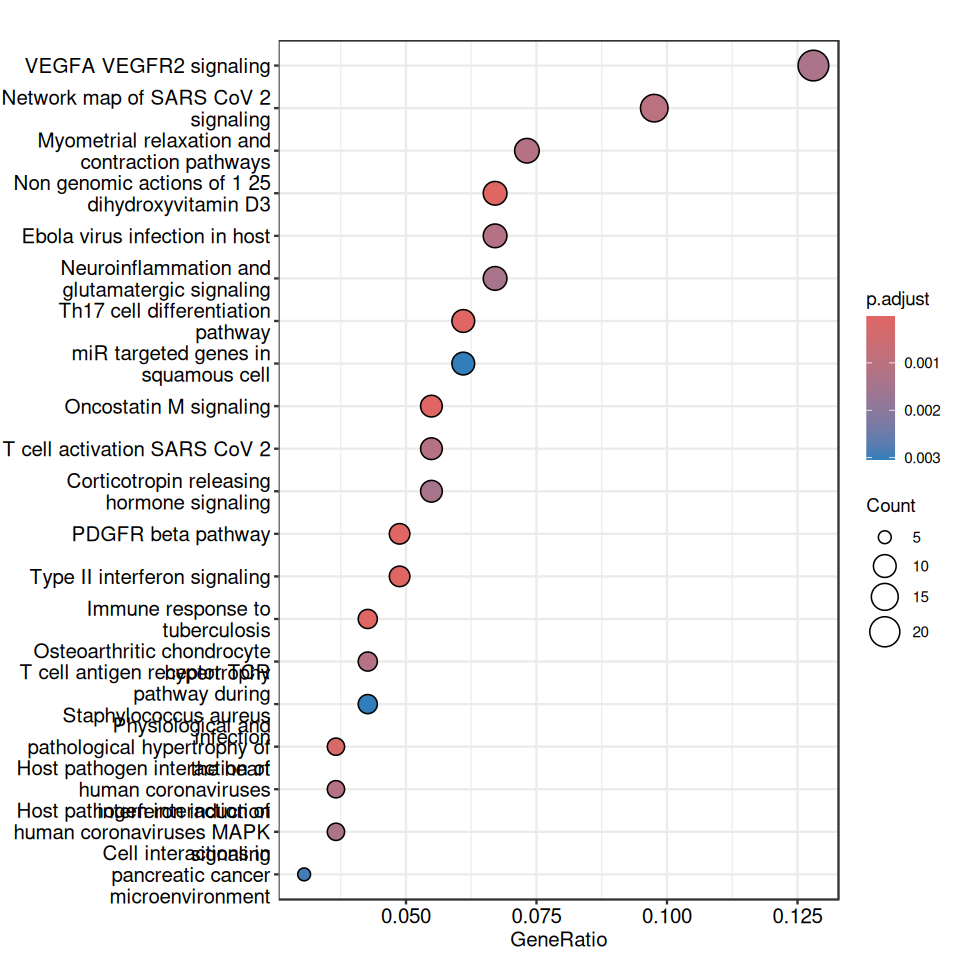

In [56]:
################################################################################ ORA
# WikiPathways Over-Representation Analysis

result <- tryCatch({

  wikipathways_enrich <- enrichWP(
    gene = gene_ids$ENTREZID,
    organism = "Homo sapiens",
    pvalueCutoff = 0.05
  )
  
  if (nrow(wikipathways_enrich@result) > 0) {
    write.table(wikipathways_enrich@result,
                file = paste0(fin_name, "_WikiPathways_ORA_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)
    
    png(paste0(fin_name, "_WikiPathways_ORA_Plot.png"), width = 1000, height = 800)
    print(dotplot(wikipathways_enrich, showCategory = 20))
    dev.off()
  } else {
    cat("No enriched WikiPathways terms found. Please adjust your parameters.\n")
  }
  
}, error = function(e) {
  cat("An error occurred during WikiPathways over-representation analysis:", conditionMessage(e), "\n")
})

options(repr.plot.width = 8, repr.plot.height = 8)
print(dotplot(wikipathways_enrich, showCategory = 20))

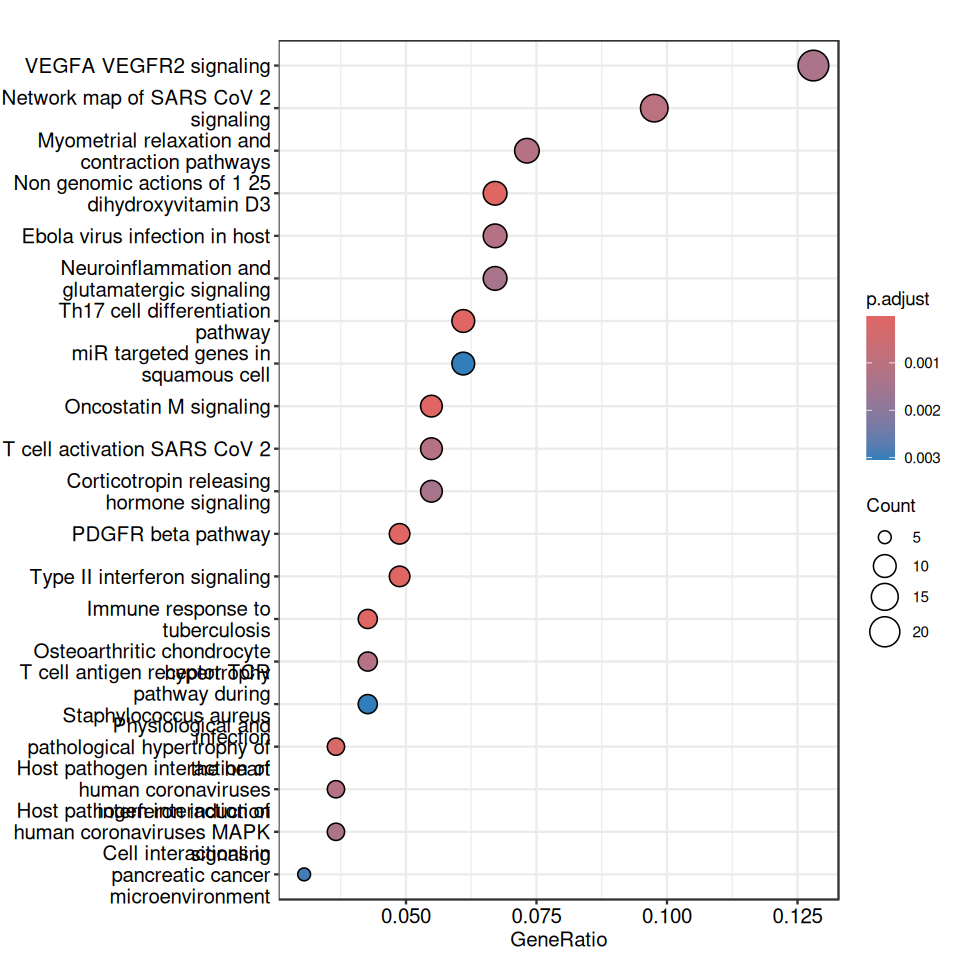

In [57]:
# WikiPathways Over-Representation Analysis

result <- tryCatch({

  wikipathways_enrich <- enrichWP(
    gene = gene_ids$ENTREZID,
    organism = "Homo sapiens",
    pvalueCutoff = 0.05
  )
  
  if (nrow(wikipathways_enrich@result) > 0) {
    write.table(wikipathways_enrich@result,
                file = paste0(fin_name, "_WikiPathways_ORA_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)
    
    png(paste0(fin_name, "_WikiPathways_ORA_Plot.png"), width = 1000, height = 800)
    print(dotplot(wikipathways_enrich, showCategory = 20))
    dev.off()
  } else {
    cat("No enriched WikiPathways terms found. Please adjust your parameters.\n")
  }
  
}, error = function(e) {
  cat("An error occurred during WikiPathways over-representation analysis:", conditionMessage(e), "\n")
})

options(repr.plot.width = 8, repr.plot.height = 8)
print(dotplot(wikipathways_enrich, showCategory = 20))

In [58]:
# WikiPathways Gene Set Enrichment Analysis

result2 <- tryCatch({

  wikipathways_gse <- gseWP(
    gene = gene_list2,
    organism = "Homo sapiens",
    pvalueCutoff = 0.1
  )
  
  if (nrow(wikipathways_gse@result) > 0) {
    write.table(wikipathways_gse@result,
                file = paste0(fin_name, "_WikiPathways_Enrichment_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)
    
    png(paste0(fin_name, "_WikiPathways_Enrichment_Plot.png"), width = 1000, height = 800)
    print(dotplot(wikipathways_gse, showCategory = 20))
    dev.off()
  } else {
    cat("No enriched WikiPathways terms found. Please adjust your parameters.\n")
  }
  
}, error = function(e) {
  cat("An error occurred during WikiPathways GSEA analysis:", conditionMessage(e), "\n")
})

# options(repr.plot.width = 8, repr.plot.height = 8)
# print(dotplot(wikipathways_gse, showCategory = 20))

using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

no term enriched under specific pvalueCutoff...



No enriched WikiPathways terms found. Please adjust your parameters.


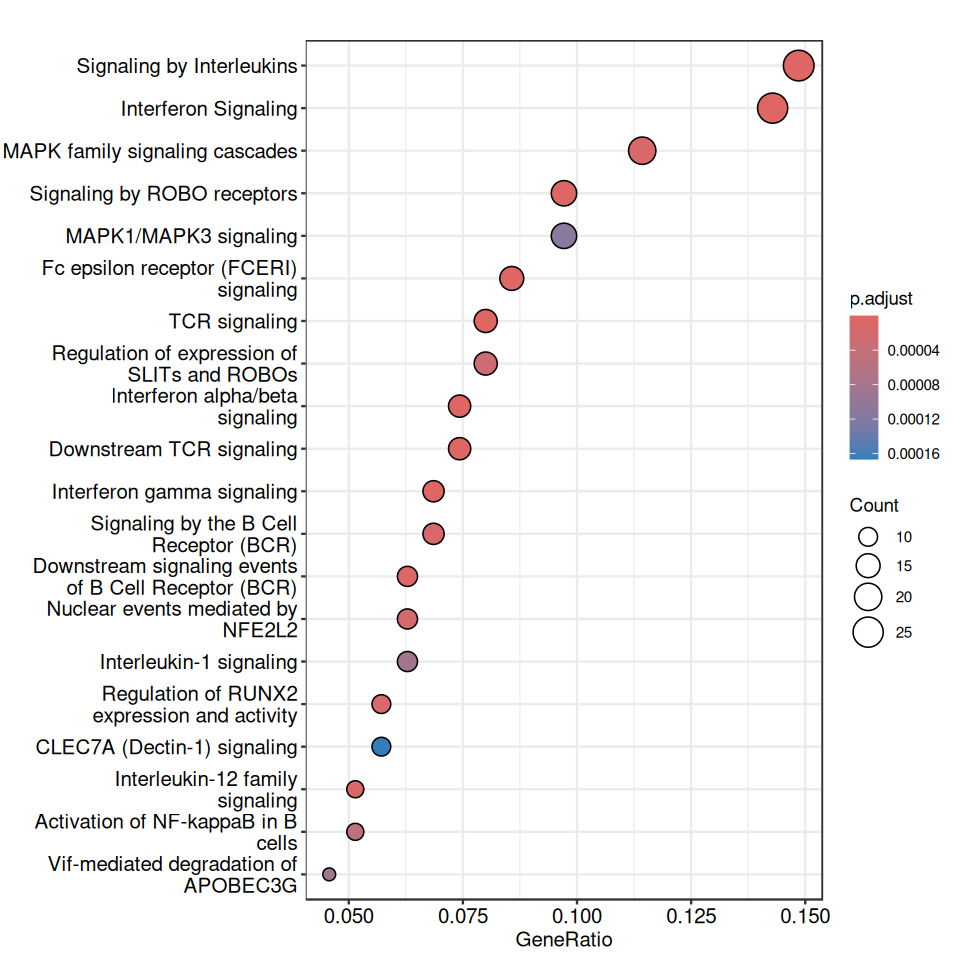

In [59]:
# Reactome Over-Representation Analysis

result <- tryCatch({

  reactome_gse <- enrichPathway(
    gene = gene_ids$ENTREZID,
    organism = "human",
    pAdjustMethod = "BH",
    pvalueCutoff = 0.05
  )
  
  if (nrow(reactome_gse@result) > 0) {
    write.table(reactome_gse@result,
                file = paste0(fin_name, "_Reactome_ORA_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)
    
    png(paste0(fin_name, "_Reactome_ORA_Plot.png"), width = 1000, height = 800)
    print(dotplot(reactome_gse, showCategory = 20))
    dev.off()
  } else {
    cat("No enriched Reactome terms found. Please adjust your parameters.\n")
  }
  
}, error = function(e) {
  cat("An error occurred during Reactome over-representation analysis:", conditionMessage(e), "\n")
})

options(repr.plot.width = 8, repr.plot.height = 8)
print(dotplot(reactome_gse, showCategory = 20))

using 'fgsea' for GSEA analysis, please cite Korotkevich et al (2019).


preparing geneSet collections...

GSEA analysis...

leading edge analysis...

done...



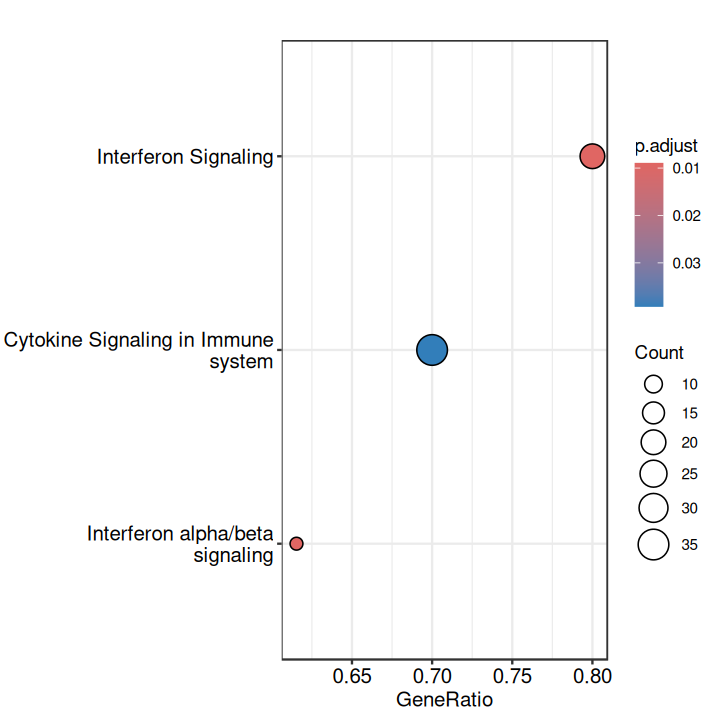

In [61]:
################################################################################ GSEA
# Reactome Gene Set Enrichment Analysis using fgsea

result2 <- tryCatch({

  reactome_gse <- gsePathway(
    gene = gene_list2,
    organism = "human",
    pAdjustMethod = "BH",
    pvalueCutoff = 0.05
  )
  
  if (nrow(reactome_gse@result) > 0) {
    write.table(reactome_gse@result,
                file = paste0(fin_name, "_Reactome_Enrichment_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)
    
    png(paste0(fin_name, "_Reactome_Enrichment_Plot.png"), width = 1000, height = 800)
    print(dotplot(reactome_gse, showCategory = 20))
    dev.off()
  } else {
    cat("No enriched Reactome terms found. Please adjust your parameters.\n")
  }
  
}, error = function(e) {
  cat("An error occurred during Reactome GSEA analysis:", conditionMessage(e), "\n")
})

options(repr.plot.width = 6, repr.plot.height = 6)
print(dotplot(reactome_gse, showCategory = 20))

In [5]:
load("sj.RData")

In [ ]:
# TNFR1 : TNFRSF1A
# TNFR2 : TNFRSF1B

In [ ]:
print("Genes of interest: TNFR2 aka TNFRSF1B")

VlnPlot(combined, features = c("TNFRSF1A", "TNFRSF1B", "FOXP3", "CTLA4", "IKZF2", "TIGIT" ), pt.size = 1)

[1] "Genes of interest: TNFR2 aka TNFRSF1B"
